<span style = "font-family: Arial; font-weight:bold;font-size:2.5em;color:blue;">Insurance Premium Default Propensity Prediction

<span style = "font-family: Arial; font-weight:bold;font-size:2em;color:blue;">Part 1

<span style = "font-family: Arial; font-weight:bold;font-size:2.2em;color:black;"> Objective - Part 1

Perform an Exploratory Data Analysis on the data
- Univariate analysis 
- Bivariate analysis 
- Visualizations to identify the patterns and insights 
- Any other exploratory deep dive
- Illustrate the insights based on EDA
- Key meaningful observations on the relationship between variables

<span style = "font-family: Arial; font-weight:bold;font-size:2.2em;color:black;">Data Dictionary

1. **id**: Unique customer ID
2. **perc_premium_paid_by_cash_credit**: What % of the premium was paid by cash payments?
3. **age_in_days**: age of the customer in days 
4. **Income**: Income of the customer 
5. **Marital Status**: Married/Unmarried, Married (1), unmarried (0)
6. **Veh_owned**: Number of vehicles owned (1-3)
7. **Count_3-6_months_late**: Number of times premium was paid 3-6 months late 
8. **Count_6-12_months_late**: Number of times premium was paid 6-12 months late 
9. **Count_more_than_12_months_late**: Number of times premium was paid more than 12 months late 
10. **Risk_score**: Risk score of customer (similar to credit score)
11. **No_of_dep**: Number of dependents in the family of the customer (1-4) 
12. **Accommodation**: Owned (1), Rented (0)
13. **no_of_premiums_paid**: Number of premiums paid till date 
14. **sourcing_channel**: Channel through which customer was sourced 
15. **residence_area_type**: Residence type of the customer
16. **premium** : Total premium amount paid till now
17. **default**: (Y variable) - 0 indicates that customer has defaulted the premium and 1 indicates that customer has not defaulted the premium

---

# Import all the necessary libraries

In [1]:
# Basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as spy
%matplotlib inline
import copy

In [2]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Pandas display settings - columns

# Display all columns
pd.set_option("display.max_columns", None)

# Data ingestion 

In [4]:
# Load dataset
data = pd.read_excel("Insurance Premium Default-Dataset.xlsx",sheet_name='premium')

# **Data Inspection**

**Preview dataset**

In [5]:
# Preview the dataset
# View the first 5, last 5 and random 10 rows
print('First five rows', '--'*55)
display(data.head())

print('Last five rows', '--'*55)
display(data.tail())

print('Random ten rows', '--'*55)
np.random.seed(1)
display(data.sample(n=10))

First five rows --------------------------------------------------------------------------------------------------------------


,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,Marital Status,Veh_Owned,No_of_dep,Accomodation,risk_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,default
0,1,0.317,11330,90050,0,0,0,0,3,3,1,98.810,8,A,Rural,5400,1
1,2,0.000,30309,156080,0,0,0,1,3,1,1,99.066,3,A,Urban,11700,1
2,3,0.015,16069,145020,1,0,0,0,1,1,1,99.170,14,C,Urban,18000,1
3,4,0.000,23733,187560,0,0,0,1,1,1,0,99.370,13,A,Urban,13800,1
4,5,0.888,19360,103050,7,3,4,0,2,1,0,98.800,15,A,Urban,7500,0


Last five rows --------------------------------------------------------------------------------------------------------------


,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,Marital Status,Veh_Owned,No_of_dep,Accomodation,risk_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,default
79848,79849,0.249,25555,64420,0,0,0,1,2,4,0,99.08,10,A,Urban,5700,1
79849,79850,0.003,16797,660040,1,0,0,0,2,1,0,99.65,9,B,Urban,28500,1
79850,79851,0.012,24835,227760,0,0,0,0,2,3,0,99.66,11,A,Rural,11700,1
79851,79852,0.190,10959,153060,1,0,0,0,2,1,0,99.46,24,A,Urban,11700,1
79852,79853,0.000,19720,324030,0,0,0,0,3,3,0,99.80,7,D,Rural,3300,1


Random ten rows --------------------------------------------------------------------------------------------------------------


,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,Marital Status,Veh_Owned,No_of_dep,Accomodation,risk_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,default
53658,53659,0.150,22643,171080,0,0,0,1,2,2,0,98.78,12,A,Urban,11700,1
25309,25310,0.201,10232,75090,0,0,0,1,3,4,0,99.61,7,A,Rural,1200,1
26163,26164,0.010,19719,144120,0,0,0,1,3,1,0,99.89,7,A,Urban,11700,1
55134,55135,0.000,23734,350070,0,0,0,1,1,1,1,99.51,9,A,Urban,1200,1
29706,29707,0.094,27023,69110,0,0,0,1,3,4,0,99.83,8,A,Urban,5400,1
11087,11088,0.123,28844,180030,0,0,0,0,2,1,1,99.47,8,A,Rural,9600,1
71267,71268,0.990,12785,55640,1,0,0,0,1,2,1,99.66,7,A,Rural,3300,1
4389,4390,0.051,22276,171080,0,0,0,0,2,2,0,99.69,11,A,Rural,7500,1
47666,47667,0.000,19717,219430,0,0,0,1,2,3,0,99.27,11,D,Urban,11700,1
31240,31241,0.000,15708,150110,0,0,0,0,3,2,0,99.71,4,C,Urban,11700,1


**Initial observations**
- `id` is row identifier, which does not add any value. This variable can be removed later.
- `perc_premium_paid_by_cash_credit` is a continuous,ratio numerical variable.
- `age_in_days`,`Income`,`Veh_Owned`, `No_of_dep`,`No_of_dep`,`no_of_premiums_paid` & `premium`  are discrete,interval numerical variables.
- `Income` is a discrete,interval numerical variable.
- `Count_3-6_months_late`, `Count_6-12_months_late` & `Count_more_than_12_months_late` are interval and discrete numerical variables.
- `Marital Status` is binary (0 - Unmarried, 1 - Married)
- `Accomodation` is binary (0 - Rented, 1 - Owned)
- `risk_score` is a continuous, numerical variable.
- `sourcing_channel` & `residence_area_type` are categorical nominal variables.
- `default` is the Target variable. It is a binary (0 - defaulter, 1 - non_defaulter) variable.

---

## Variable List

In [6]:
# Display list of variables in dataset
variable_list = data.columns.tolist()
print(variable_list)

['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income', 'Count_3-6_months_late', 'Count_6-12_months_late', 'Count_more_than_12_months_late', 'Marital Status', 'Veh_Owned', 'No_of_dep', 'Accomodation', 'risk_score', 'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type', 'premium', 'default']


---

Let's rename the variables for ease of programming

In [7]:
# Column rename dictionary
renamed_columns = {
    'id': 'ID',
    'perc_premium_paid_by_cash_credit': 'Perc_premium_paid_in_cash',
    'age_in_days': 'Age_in_days',
    'Count_3-6_months_late': 'Late_premium_payment_3-6_months',
    'Count_6-12_months_late': 'Late_premium_payment_6-12_months',
    'Count_more_than_12_months_late': 'Late_premium_payment_>12_months',
    'Marital Status': 'Marital_Status',
    'Veh_Owned': 'Vehicles_Owned',
    'No_of_dep': 'No_of_dependents',
    'risk_score': 'Risk_score',
    'no_of_premiums_paid': 'No_of_premiums_paid',
    'sourcing_channel': 'Sourcing_channel',
    'residence_area_type': 'Customer_demographic',
    'premium': 'Premium_payment',
    'default': 'Default'
}

# Rename dataframe columns names
data = data.rename(columns = renamed_columns)

In [8]:
# Check for updated column names
variable_list = data.columns.tolist()
print(variable_list)

['ID', 'Perc_premium_paid_in_cash', 'Age_in_days', 'Income', 'Late_premium_payment_3-6_months', 'Late_premium_payment_6-12_months', 'Late_premium_payment_>12_months', 'Marital_Status', 'Vehicles_Owned', 'No_of_dependents', 'Accomodation', 'Risk_score', 'No_of_premiums_paid', 'Sourcing_channel', 'Customer_demographic', 'Premium_payment', 'Default']


---

## Dataset shape

In [9]:
shape = data.shape
n_rows = shape[0]
n_cols = shape[1]
print(f"The Dataframe consists of '{n_rows}' rows and '{n_cols}' columns")

The Dataframe consists of '79853' rows and '17' columns


**Data types**

In [10]:
# Check the data types
data.dtypes

ID                                    int64
Perc_premium_paid_in_cash           float64
Age_in_days                           int64
Income                                int64
Late_premium_payment_3-6_months       int64
Late_premium_payment_6-12_months      int64
Late_premium_payment_>12_months       int64
Marital_Status                        int64
Vehicles_Owned                        int64
No_of_dependents                      int64
Accomodation                          int64
Risk_score                          float64
No_of_premiums_paid                   int64
Sourcing_channel                     object
Customer_demographic                 object
Premium_payment                       int64
Default                               int64
dtype: object

**Data info**

In [11]:
# Get info of the dataframe columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79853 entries, 0 to 79852
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                79853 non-null  int64  
 1   Perc_premium_paid_in_cash         79853 non-null  float64
 2   Age_in_days                       79853 non-null  int64  
 3   Income                            79853 non-null  int64  
 4   Late_premium_payment_3-6_months   79853 non-null  int64  
 5   Late_premium_payment_6-12_months  79853 non-null  int64  
 6   Late_premium_payment_>12_months   79853 non-null  int64  
 7   Marital_Status                    79853 non-null  int64  
 8   Vehicles_Owned                    79853 non-null  int64  
 9   No_of_dependents                  79853 non-null  int64  
 10  Accomodation                      79853 non-null  int64  
 11  Risk_score                        79853 non-null  float64
 12  No_o

- Two (2) variables have been identified as `Panda object` type. These shall be converted to the `category` type.

**Convert Pandas Objects to Category type**

In [12]:
# Convert variables with "object" type to "category" type
for i in data.columns:
    if data[i].dtypes == "object":
        data[i] = data[i].astype("category") 

# Confirm if there no variables with "object" type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79853 entries, 0 to 79852
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   ID                                79853 non-null  int64   
 1   Perc_premium_paid_in_cash         79853 non-null  float64 
 2   Age_in_days                       79853 non-null  int64   
 3   Income                            79853 non-null  int64   
 4   Late_premium_payment_3-6_months   79853 non-null  int64   
 5   Late_premium_payment_6-12_months  79853 non-null  int64   
 6   Late_premium_payment_>12_months   79853 non-null  int64   
 7   Marital_Status                    79853 non-null  int64   
 8   Vehicles_Owned                    79853 non-null  int64   
 9   No_of_dependents                  79853 non-null  int64   
 10  Accomodation                      79853 non-null  int64   
 11  Risk_score                        79853 non-null  floa

- `The memory usage has decreased from 10.4+ MB to 9.3 MB`

**Missing value summary function**

In [13]:
def missing_val_chk(data):
    """
    This function to checks for missing values 
    and generates a summary.
    """
    if data.isnull().sum().any() == True:
        # Number of missing in each column
        missing_vals = pd.DataFrame(data.isnull().sum().sort_values(
            ascending=False)).rename(columns={0: '# missing'})

        # Create a percentage missing
        missing_vals['percent'] = ((missing_vals['# missing'] / len(data)) *
                                   100).round(decimals=3)

        # Remove rows with 0
        missing_vals = missing_vals[missing_vals['# missing'] != 0].dropna()

        # display missing value dataframe
        print("The missing values summary")
        display(missing_vals)
    else:
        print("There are NO missing values in the dataset")

## Missing Values Check

In [14]:
#Applying the missing value summary function
missing_val_chk(data)

There are NO missing values in the dataset


***

Before we check the 5 Point numerical summary, let's verify that `ID` is row identifier.

If this is the case then the number of unique values will equal the number of rows.

In [15]:
# Check to see if ID unique values equal number of rows

if data.ID.nunique() == data.shape[0]:
    print("ID is a row identifier, we shall drop ID variable")
else:
    print("ID is a row identifier")

ID is a row identifier, we shall drop ID variable


**Dropping ID variable**

In [16]:
data.drop(columns="ID", axis=1, inplace=True)

---

## 5 Point Summary

**Numerical type Summary**

In [17]:
# Five point summary of all numerical type variables in the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Perc_premium_paid_in_cash,79853.0,0.314288,0.334915,0.0,0.034,0.167,0.538,1.00
Age_in_days,79853.0,18846.696906,5208.719136,7670.0,14974.000,18625.000,22636.000,37602.00
Income,79853.0,208847.171177,496582.597257,24030.0,108010.000,166560.000,252090.000,90262600.00
Late_premium_payment_3-6_months,79853.0,0.248369,0.691102,0.0,0.000,0.000,0.000,13.00
Late_premium_payment_6-12_months,79853.0,0.078093,0.436251,0.0,0.000,0.000,0.000,17.00
Late_premium_payment_>12_months,79853.0,0.059935,0.311840,0.0,0.000,0.000,0.000,11.00
Marital_Status,79853.0,0.498679,0.500001,0.0,0.000,0.000,1.000,1.00
Vehicles_Owned,79853.0,1.998009,0.817248,1.0,1.000,2.000,3.000,3.00
No_of_dependents,79853.0,2.503012,1.115901,1.0,2.000,3.000,3.000,4.00
Accomodation,79853.0,0.501296,0.500001,0.0,0.000,1.000,1.000,1.00


- `Perc_premium_paid_in_cash` is highly right skewed as the *mean* is almost twice the *median*. Also the *standard deviation* is greater than the *mean* implying a wide spread.   

- `Age_in_days` is fairly symmetrical with *mean* and *median* being very close but there is some right skew as the difference between Q3 & Q4 is larger than other quartiles.
- `Income` highly right skewed as the *mean* is greater than the *median*. Also the *standard deviation* is more than twice the *mean* implying a wide spread.
- `Late_premium_payment_3-6_months`, `Late_premium_payment_6-12_months` & `Late_premium_payment_>12_months` are categorical ordinal variables.
- `Marital_Status` is a binary variable with approximately 50% of the rows having a value of 1 (50% of the customers are married).
- `Vehicles_Owned` & `No_of_dependents` are categorical ordinal variables.
- `Accomodation` is a binary variable with approximately 50% of the rows having a value of 1 (50% of the customers owned their homes).
- `Risk_score` is fairly symmetrical with *mean* and *median* being very close.
- `No_of_premiums_paid` is fairly symmetrical with *mean* and *median* being very close but there is some right skew as the difference between Q3 & Q4 is larger than other quartiles.
- `Premium_payment` is highly right skewed as the *mean* is greater than the *median*. Also the *standard deviation* is close to the *mean* implying a wide spread.
- `Default` is a binary variable with approximately 94% of the rows having a value of 1 (94% of the customers are non-defaulters). This target variable is heavily imbalanced as only 6% of the rows are defaulters.

**Categorical type Summary**

In [18]:
data.describe(include=['category']).T

,count,unique,top,freq
Sourcing_channel,79853,5,A,43134
Customer_demographic,79853,2,Urban,48183


- `Sourcing_channel` there are 5 different states in which "A" is the most frequent.
- `Customer_demographic` there are 2 different states in which "Urban" is the most frequent. 

<font color='red'>**This dataset will be skewed to policy holders sourced from _Channel A_ and _Urban_ residences**

---

**Number of unique states for all variables**

In [19]:
# Check the unique values
data.nunique().to_frame()

,0
Perc_premium_paid_in_cash,1001
Age_in_days,833
Income,24165
Late_premium_payment_3-6_months,14
Late_premium_payment_6-12_months,17
Late_premium_payment_>12_months,10
Marital_Status,2
Vehicles_Owned,3
No_of_dependents,4
Accomodation,2


**Categorical Variable Identification**

Although the following variables are numerical in nature, they represent **categorical** variables:
* `Late_premium_payment_3-6_months`
* `Late_premium_payment_6-12_months`
* `Late_premium_payment_>12_months`
* `Vehicles_Owned`
* `No_of_dependents` 

---

**Create a list of numerical variables**

In [20]:
numerical_vars = [
    'Perc_premium_paid_in_cash', 'Age_in_days', 'Income', 'Risk_score',
    'No_of_premiums_paid', 'Premium_payment'
]

**Create a list of categorical variables**

In [21]:
categorical_vars = [
    'Late_premium_payment_3-6_months', 'Late_premium_payment_6-12_months',
    'Late_premium_payment_>12_months', 'Marital_Status', 'Vehicles_Owned',
    'No_of_dependents', 'Accomodation', 'Sourcing_channel',
    'Customer_demographic', 'Default'
]

---

## Numerical data

In [22]:
data[numerical_vars].describe().T

,count,mean,std,min,25%,50%,75%,max
Perc_premium_paid_in_cash,79853.0,0.314288,0.334915,0.0,0.034,0.167,0.538,1.00
Age_in_days,79853.0,18846.696906,5208.719136,7670.0,14974.000,18625.000,22636.000,37602.00
Income,79853.0,208847.171177,496582.597257,24030.0,108010.000,166560.000,252090.000,90262600.00
Risk_score,79853.0,99.067243,0.725892,91.9,98.830,99.180,99.520,99.89
No_of_premiums_paid,79853.0,10.863887,5.170687,2.0,7.000,10.000,14.000,60.00
Premium_payment,79853.0,10924.507533,9401.676542,1200.0,5400.000,7500.000,13800.000,60000.00


### Skew Summary

In [23]:
# Display the skew summary for the numerical variables
for var in data[numerical_vars].columns:
    var_skew = data[var].skew()
    if var_skew > 1:
        print(f"The '{var}' distribution is highly right skewed.\n")
    elif var_skew < -1:
        print(f"The '{var}' distribution is highly left skewed.\n")
    elif (var_skew > 0.5) & (var_skew < 1):
        print(f"The '{var}' distribution is moderately right skewed.\n")
    elif (var_skew < -0.5) & (var_skew > -1):
        print(f"The '{var}' distribution is moderately left skewed.\n")
    else:
        print(f"The '{var}' distribution is fairly symmetrical.\n")

The 'Perc_premium_paid_in_cash' distribution is moderately right skewed.

The 'Age_in_days' distribution is fairly symmetrical.

The 'Income' distribution is highly right skewed.

The 'Risk_score' distribution is highly left skewed.

The 'No_of_premiums_paid' distribution is highly right skewed.

The 'Premium_payment' distribution is highly right skewed.



**Outlier check function**

In [24]:
# Outlier check
def outlier_count(data):
    """
    This function checks the lower and upper 
    outliers for all numerical variables.
    
    Outliers are found where data points exists either:
    - Greater than `1.5*IQR` above the 75th percentile
    - Less than `1.5*IQR` below the 25th percentile
    """
    numeric = data.select_dtypes(include=np.number).columns.to_list()
    for i in numeric:
        # Get name of series
        name = data[i].name
        # Calculate the IQR for all values and omit NaNs
        IQR = spy.stats.iqr(data[i], nan_policy="omit")
        # Calculate the boxplot upper fence
        upper_fence = data[i].quantile(0.75) + 1.5 * IQR
        # Calculate the boxplot lower fence
        lower_fence = data[i].quantile(0.25) - 1.5 * IQR
        # Calculate the count of outliers above upper fence
        upper_outliers = data[i][data[i] > upper_fence].count()
        # Calculate the count of outliers below lower fence
        lower_outliers = data[i][data[i] < lower_fence].count()
        # Check if there are no outliers
        if (upper_outliers == 0) & (lower_outliers == 0):
            continue
        print(
            f"The '{name}' distribution has '{lower_outliers}' lower outliers and '{upper_outliers}' upper outliers.\n"
        )

### Outlier check

In [25]:
#Applying the Outlier check function for the sub-dataframe of numerical variables
outlier_count(data[numerical_vars])

The 'Age_in_days' distribution has '0' lower outliers and '44' upper outliers.

The 'Income' distribution has '0' lower outliers and '3428' upper outliers.

The 'Risk_score' distribution has '3784' lower outliers and '0' upper outliers.

The 'No_of_premiums_paid' distribution has '0' lower outliers and '1426' upper outliers.

The 'Premium_payment' distribution has '0' lower outliers and '4523' upper outliers.



### Numerical Variable Summary

| Variable| Skew | Outliers | 
| :-: | :-: | :-: |
| **Perc_premium_paid_in_cash** | Moderately right skewed | No Outliers | 
| **Age_in_days** | Fairly symmetrical | 44 Upper Outliers | 
| **Income** | Highly right skewed | 3428 Upper Outliers |
| **Risk_score** | Highly left skewed | 3784 Lower Outliers |
| **No_of_premiums_paid** | Highly right skewed | 1426 Upper Outliers |
| **Premium_payment** | Highly right skewed | 4523 Upper Outliers |

---

## Categorical data

### Unique states

**Detailed investigation of unique values**

In [26]:
# Display the unique values for all categorical variables
for i in categorical_vars:
    print('Unique values in',i, 'are :')
    print(data[i].value_counts())
    print('--'*55)

Unique values in Late_premium_payment_3-6_months are :
0     66898
1      8826
2      2519
3       954
4       374
5       168
6        68
7        23
8        15
9         4
10        1
11        1
12        1
13        1
Name: Late_premium_payment_3-6_months, dtype: int64
--------------------------------------------------------------------------------------------------------------
Unique values in Late_premium_payment_6-12_months are :
0     75928
1      2680
2       693
3       317
4       130
5        46
6        26
7        11
8         5
9         4
10        4
11        2
13        2
14        2
12        1
15        1
17        1
Name: Late_premium_payment_6-12_months, dtype: int64
--------------------------------------------------------------------------------------------------------------
Unique values in Late_premium_payment_>12_months are :
0     76135
1      2996
2       498
3       151
4        48
5        13
6         6
7         3
8         2
11        1
Name: Late_prem

- `Late_premium_payment_6-12_months` - there is discontinuity in the unique values as state 16 is missing in the range. 
-  `Late_premium_payment_>12_months` - there is discontinuity in the unique values as states 9 & 10 are missing in the range.

---

### Categorical Variable Summary

There are categorical variables in the numeric format.

| Variable| Type | Range | 
| :-: | :-: | :-: |
| **Late_premium_payment_3-6_months**| Ordinal | 14 states |
| **Late_premium_payment_6-12_months**| Ordinal | 17 states |
| **Late_premium_payment_>12_months**| Ordinal | 10 states |
| **Marital_Status**| Nominal | 2 states |
| **Vehicles_Owned**| Ordinal | 3 states |
| **No_of_dependents**| Ordinal | 4 states |
| **Accomodation**| Nominal | 2 states |
| **Sourcing_channel**| Nominal | 5 states |
| **Customer_demographic**| Nominal | 2 states |
| **Default**| Nominal | 2 states |

---

## Target Variable

Target variable is **`Default`**

In [27]:
# Checking the distribution of target variable

# Count the different "Default" states
count = data["Default"].value_counts().T
# Calculate the percentage different "Default" states
percentage = data['Default'].value_counts(normalize=True).T * 100
# Join count and percentage series
target_dist = pd.concat([count, percentage], axis=1)
# Set column names
target_dist.columns = ['count', 'percentage']
# Set Index name
target_dist.index.name = "Default"
# Display target distribution dataframe
target_dist

,count,percentage
Default,,
1,74855,93.740999
0,4998,6.259001


**Out of the 79854 policy holders, only 6.26% defaulted**

<font color='red'> The Target variable is **Heavily Imbalanced**

---

# Exploratory Data Analysis

## Univariate Analysis

### Numerical Variables

#### Histogram Overview

Let's get an overview of the distributions of the numerical variables.

In [28]:
def histogram_overview(data):
    """
    Histogram Overview function
    
    This function below generates a subplots of  `histogram plots` & 
    showing the `distribution of the numerical varible input`
    
    * Generates subplots for each numerical variable in a three column structure.
    * The function takes the Pandas dataframe as the input
    * The function selects the numerical variables from the applied dataframe.
    * It generates a vertical `line` to indicate the `mean`, `median` and `mode` on the histogram
    * `sns.set_style` - sets the Seaborn theme
    * `subplot_nrows` - calculated number of subplot rows
    * `subplot_ncols` - configures the three column structure subplots
    * `figsize` - indicates the size of the plot
    * `sns.reset_defaults()` - resets Seaborn themes and settings to default
    
    """
    num_vars = data.select_dtypes(include=np.number).columns.to_list()
    plt.figure(figsize=(10, 10))
    for i in range(len(num_vars)):
        # Set seaborn theme
        sns.set_style("darkgrid")
        # Subplot no of columns
        subplot_ncols = np.ceil(np.sqrt(len(num_vars)))
        # Subplot no of rows
        subplot_nrows = subplot_ncols

        plt.subplot(subplot_nrows, subplot_ncols, i + 1)

        plt.hist(data[num_vars[i]])
        #Plot vertical line for the mean
        plt.axvline(data[num_vars[i]].mean(),
                    color='green',
                    linestyle='--',
                    label="mean")
        #Plot vertical line for the median
        plt.axvline(data[num_vars[i]].median(),
                    color='red',
                    linestyle='-',
                    label="median")
        #Plot vertical line for the mode
        plt.axvline(data[num_vars[i]].mode()[0],
                    color='black',
                    linestyle='-',
                    label="mode")
        plt.legend()
        plt.tight_layout()
        plt.title(num_vars[i], fontsize=16)
    plt.show()
    # Reset seaborn theme
    sns.reset_defaults()

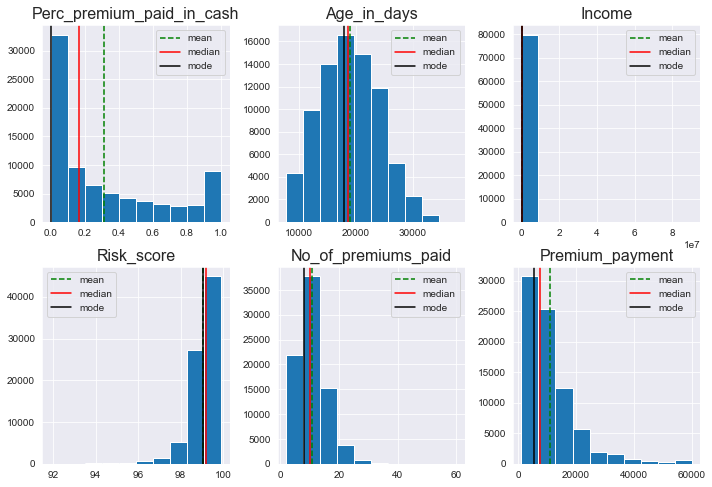

In [29]:
histogram_overview(data[numerical_vars])

**Observation:**
* **Age_in_days** - Somewhat normal as the mean and median are very close.

* All other variables are skewed.

#### Boxplot overview

Let's get a boxplot overview across each numerical variable

In [30]:
def boxplot_overview(data):
    """
    This function below generates a subplots of  `box plots` & 
    showing the `distribution of the numerical varible input with outliers`.
    
    * Generates subplots for each numerical variable in a three column structure.
    * The function takes the Pandas dataframe as the input
    * The function selects the numerical variables from the applied dataframe.
    * It shows the `mean` in the boxplot.
    * `sns.set_style` - sets the Seaborn theme
    * `subplot_nrows` - calculated number of subplot rows
    * `subplot_ncols` - configures the three column structure subplots
    * `figsize` - indicates the size of the plot
    * `sns.reset_defaults()` - resets Seaborn themes and settings to default
    
    """

    num_vars = data.select_dtypes(include=np.number).columns.to_list()
    plt.figure(figsize=(10, 10))
    for i in range(len(num_vars)):
        # Set seaborn theme
        sns.set_style("darkgrid")
        # Subplot no of columns
        subplot_ncols = np.ceil(np.sqrt(len(num_vars)))
        # Subplot no of rows
        subplot_nrows = subplot_ncols
          
        plt.subplot(subplot_nrows, subplot_ncols, i + 1)
        sns.boxplot(y=data[num_vars[i]], width=0.3, showmeans=True)
        plt.tight_layout()
        plt.title(num_vars[i], fontsize=16)
    plt.show()
    # Reset seaborn theme
    sns.reset_defaults()

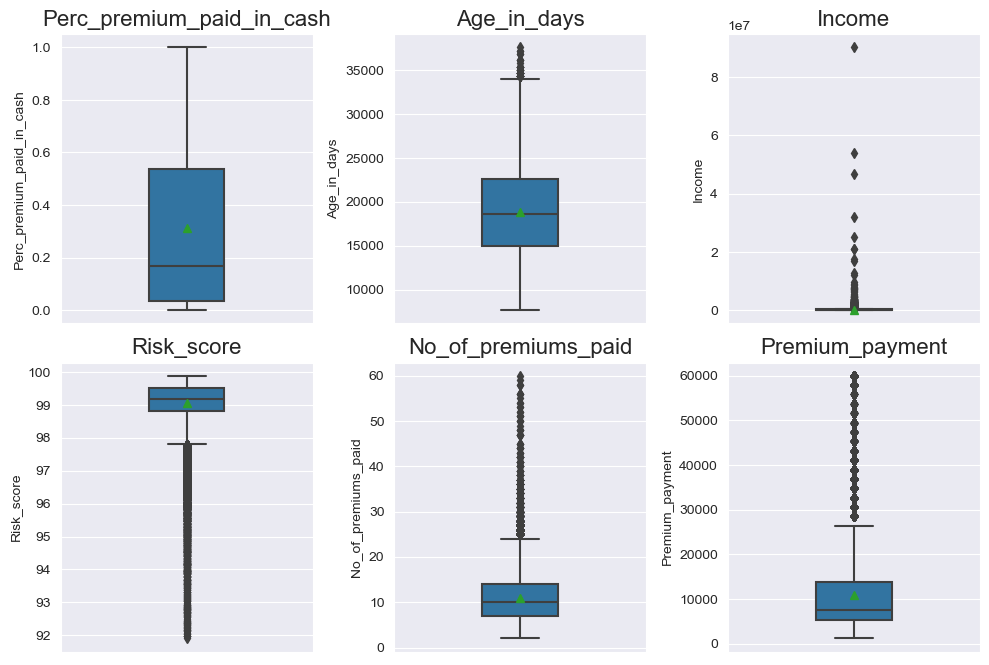

In [31]:
boxplot_overview(data[numerical_vars])

**Observation:**
* **Perc_premium_paid_in_cash** has no outliers.

* **Age_in_days** , **Income**, **No_of_premiums_paid** & **Premium_payment** -  have upper outliers.

* **Risk_score** has lower outliers

#### Histogram Distribution

Let's generate Histograms for each numerical variable and visually identify any its distributions.

In [32]:
def hist_box(data):
    """
    This function below generates a `box plot` & `histogram` 
    showing the `distribution of the numerical varible input`.
    * The function also checks for `outliers` and states the location (`lower`/`upper`)
    * The function also `generates an image file` of the plot.
    * The function takes the Pandas series as the input.
    * It creates a `subplot` with `box plot` and `histogram` distribution
    * It generates a vertical `line` to indicate the `mean`, `median` and `mode` on the histogram
    * It calculates the Inter Quartile Range using `Scipy Stats`
    * `sns.set_style` - sets the Seaborn theme
    * `nrows` - sets the shape of the subplot
    * `gridspec_kw` - configures the ratio of the size of the plots
    * `figsize` - indicates the size of the plot
    * `sns.reset_defaults()` - resets Seaborn themes and settings to default
    
    """

    # Get name of series
    name = data.name
    sns.set_style("darkgrid")
    f, axes = plt.subplots(nrows=2,
                           gridspec_kw={"height_ratios": (1, 3)})
    sns.boxplot(data, showmeans=True, color='m', ax=axes[0])
    sns.distplot(data, bins=15, ax=axes[1], color='deepskyblue', kde=False)
    axes[1].axvline(data.mean(), color='green', linestyle='--', label="mean")
    axes[1].axvline(data.median(), color='red', linestyle='-', label="median")
    axes[1].axvline(data.mode()[0], color='black', linestyle='-', label="mode")
    plt.legend(("mean", "median", "mode"), fontsize=12)
    plt.suptitle("Distribution of {}".format(name), fontsize=22)
    plt.tight_layout()
    plt.show()

    # Outlier check
    IQR = spy.stats.iqr(data, nan_policy="omit")
    upper_fence = data.quantile(0.75) + 1.5 * IQR
    lower_fence = data.quantile(0.25) - 1.5 * IQR
    upper_outliers = data[data > upper_fence].count()
    lower_outliers = data[data < lower_fence].count()
    print(
        f"The '{name}' distribution has '{lower_outliers}' lower outliers and '{upper_outliers}' upper outliers."
    )

    # Line separator
    print('--' * 55)

---

**Plot the distribution of all numerical variables**

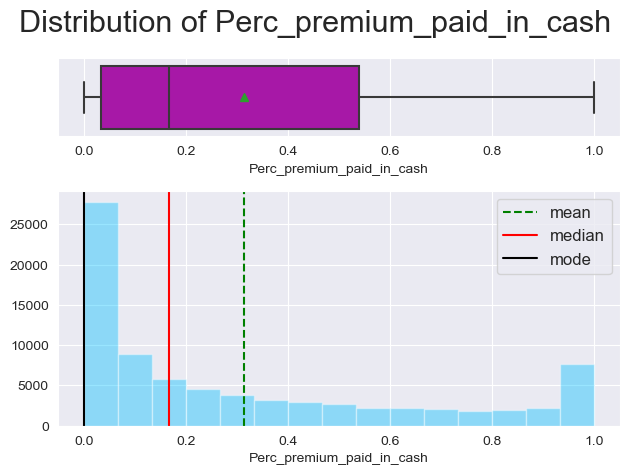

The 'Perc_premium_paid_in_cash' distribution has '0' lower outliers and '0' upper outliers.
--------------------------------------------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

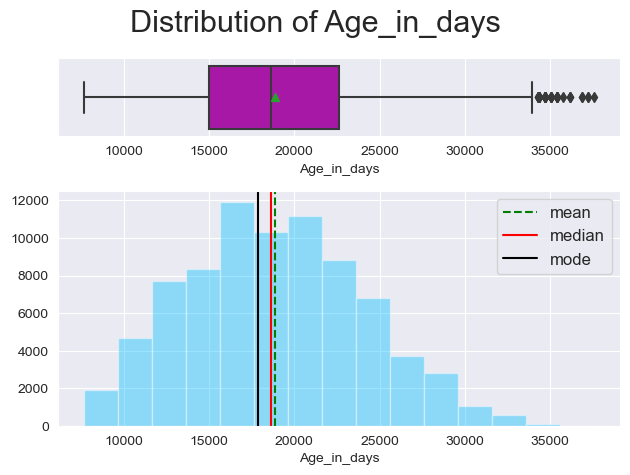

The 'Age_in_days' distribution has '0' lower outliers and '44' upper outliers.
--------------------------------------------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

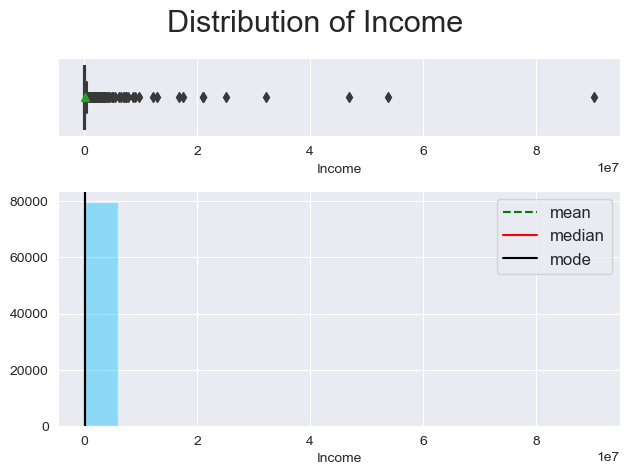

The 'Income' distribution has '0' lower outliers and '3428' upper outliers.
--------------------------------------------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

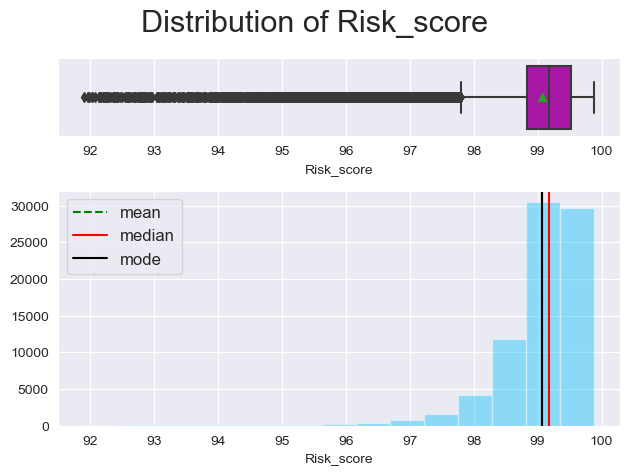

The 'Risk_score' distribution has '3784' lower outliers and '0' upper outliers.
--------------------------------------------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

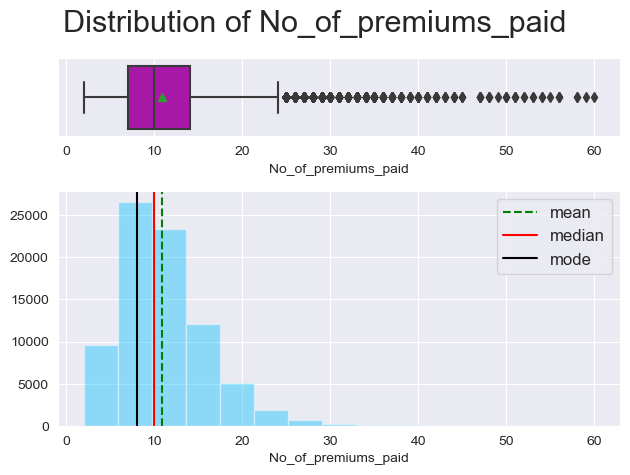

The 'No_of_premiums_paid' distribution has '0' lower outliers and '1426' upper outliers.
--------------------------------------------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

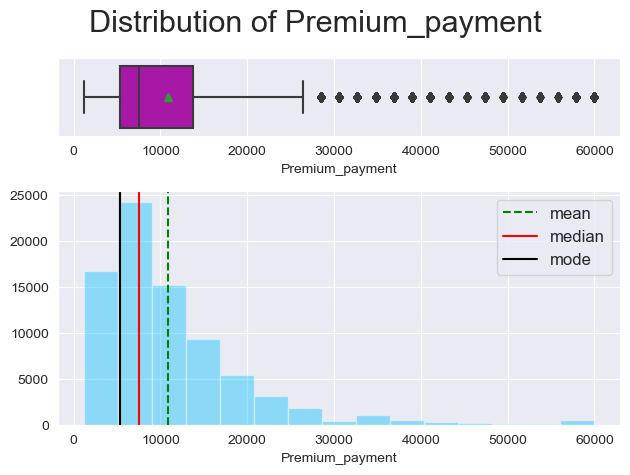

The 'Premium_payment' distribution has '0' lower outliers and '4523' upper outliers.
--------------------------------------------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

In [33]:
for each_var in data[numerical_vars].columns:
    hist_box(data=data[each_var])
    plt.figure()
    plt.show()

**Observation:**
* `Perc_premium_paid_in_cash`
    * The bulk of the policy holders paid between 5%-55% of their policy in cash.
* `Age_in_days`
    * The bulk of the policy holders are between 15,000-22,500 days old (41-62 years old), i.e., middle aged to senior adults.
* `Income`
    * Income is greatly skewed in the dataset with some policy holders making over 10,000,000.
* `Risk_score`
    * The policy holders' risk scores typically range from 98-100% with outliers as far as 92%

* `No_of_premiums_paid`
    * The number of premiums paid by policy holders typically range from 0-24 with the bulk being within 7-14.
    
* `Premium_payment`
    * The bulk of the insurance premiums range from 5,000 to 15,000.
    * There are some policies in excess of 30,000

---

### Categorical Variables

We shall use bar chart to represent the categorical variables.

In [34]:
def bar_chart(data):
    """
    This function below generates a `bar chart` showing
    the `distribution of the categorical varible input`.
    * The function also `generates an image file` of the plot.
    * The function takes the Pandas series as the input.
    * It `computes the frequency of each unique element` and 
      displays the distribution of the elements to in horizontal bars.
    * The `percentage of each bar` is also calculated and placed to 
      the right end of each bar.
    * `sns.despine()` - removes the upper and right border of the chart
    * For each horizontal bar the width is calculated as a percentage of
      the entire quanta of datapoints.
    * The percentage is annotated to the each bar by plotting the cardinal locations.

    """
    
    # Create a horizontal count plot while sorting variables in descending order
    g=sns.countplot(y=data)
    # Remove the top and right spines from plot
    sns.despine()
    # length of the column
    col_length = len(data) 
    for p in g.patches:
        # percentage of each class of the category
        percentage = '{:.1f}%'.format(100 * p.get_width()/col_length)
        # width of the plot
        x = p.get_x() + p.get_width() + 0.02
        # height of the plot
        y = p.get_y() + p.get_height()/2
        # annotate the percentage
        g.annotate(percentage, (x, y), size = 12) 
        plt.title("Distribution of {}".format(data.name),loc="center",fontsize = 22)
    plt.show()
    # Line separator
    print('--'*55)


---

**Plot the distribution of all categorical variables**

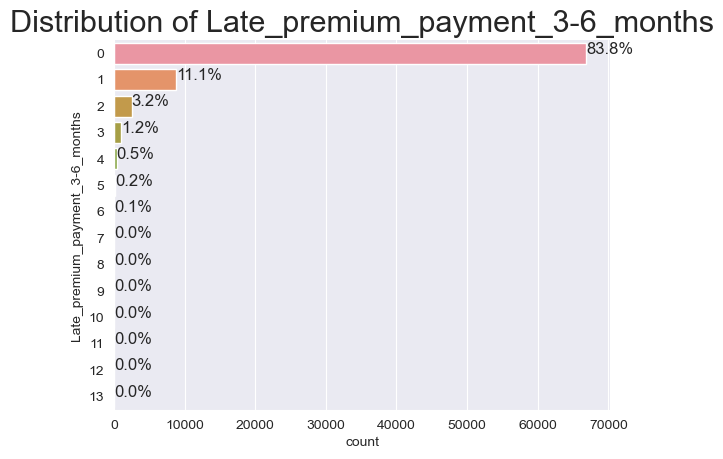

--------------------------------------------------------------------------------------------------------------


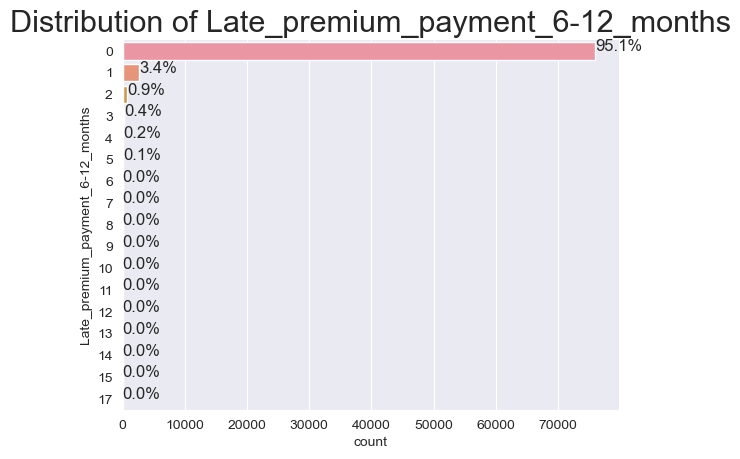

--------------------------------------------------------------------------------------------------------------


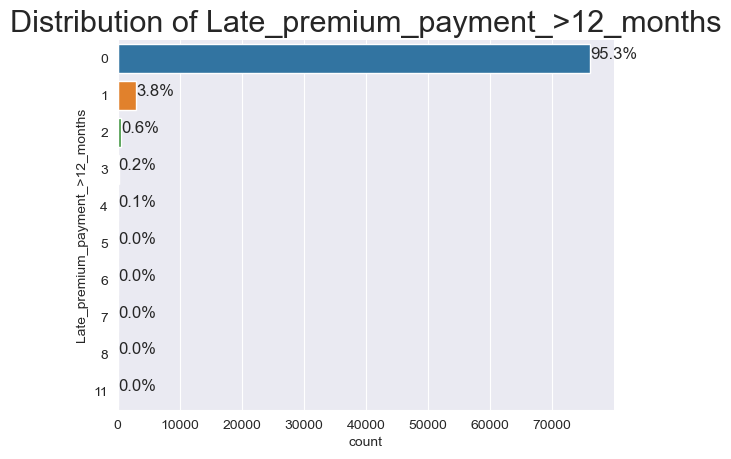

--------------------------------------------------------------------------------------------------------------


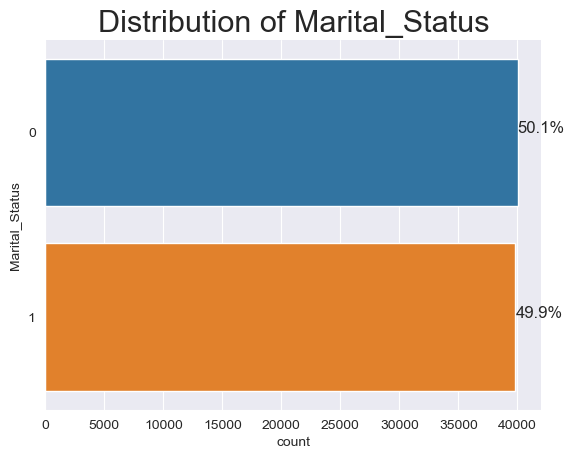

--------------------------------------------------------------------------------------------------------------


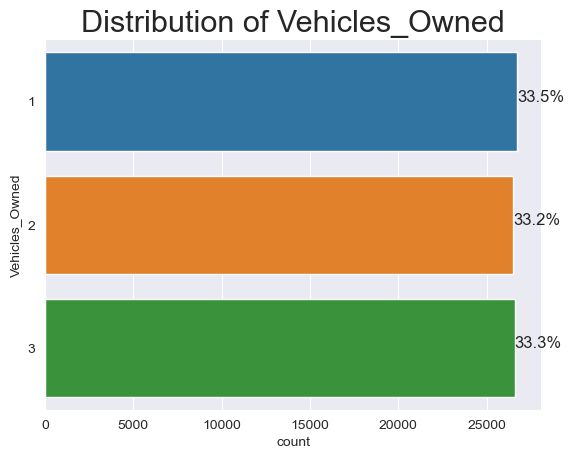

--------------------------------------------------------------------------------------------------------------


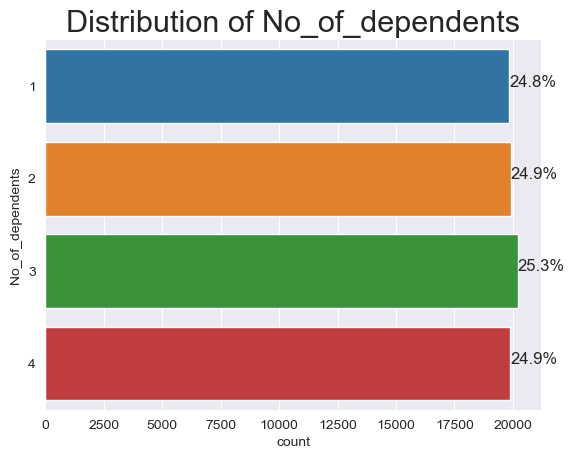

--------------------------------------------------------------------------------------------------------------


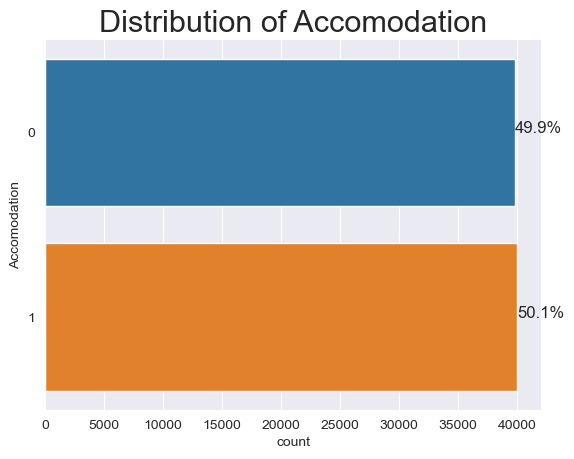

--------------------------------------------------------------------------------------------------------------


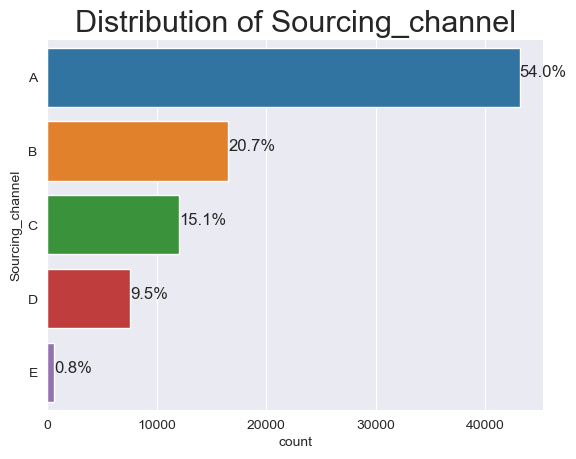

--------------------------------------------------------------------------------------------------------------


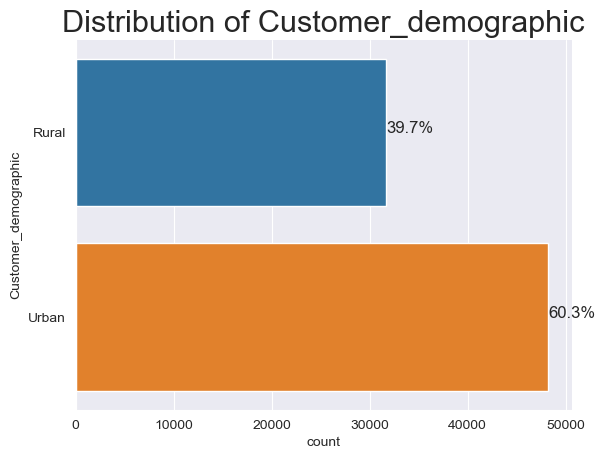

--------------------------------------------------------------------------------------------------------------


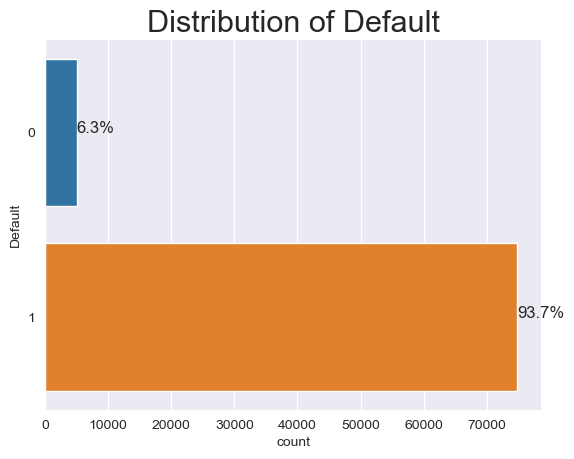

--------------------------------------------------------------------------------------------------------------


In [35]:
for each_var in data[categorical_vars].columns:
    plt.figure()
    bar_chart(data=data[each_var])

**Observations:**
* Policy holders typically pay their premiums on times as the majority of them were not late on payments.   
This is indicative of the policy holders having an active policy to exercise claims.
* The policy holders in this dataset is more or less evenly balanced across `Marital Status` as appromimately 50% are _Married_ and _Unmarried_
* The distribution of `Number of vehicles owned` across policy holders is also evenly balanced as approximately 33% have  one (1), two (2) and three(3) vehicles.
* The distribution of `Number of dependents` across policy holders is also evenly balanced as approximately 25% have  one (1), two (2) , three(3) and four(4) dependents.
* The policy holders in this dataset is more or less evenly balanced across `Accomodation` as appromimately 50% _owned_ or _rented_ their place of residence.
* The bulk of the policy holders were sourced using `Channel A` (54%) while the least was `Channel E`
* The majority of the policy holders reside in `Urban` residence types (~60%)
* 6.3% of the policy holders defaulted on their premium payments. The data is `heavily imbalanced`

---

## Numerical Correlation Analysis

Let's check to see to see if there are correlations between the numerical variables.

Since it was observed that `Marital Status`, `Number of vehicles owned`,`Number of dependents` & `Accomodation` were evenly balanced across the dataset, these variables will not provide any meaningful correlations when exploring the heatmaps.

Therefore let's create a subset of the variables for numerical correlation analysis.

In [36]:
# Variables to ignore in numerical correlation analysis
variables_to_ignore = [
    'Marital_Status', 'Vehicles_Owned', 'No_of_dependents', 'Accomodation'
]
# Create a new list of columns
num_corr_vars = data.columns.tolist()
for variables in variables_to_ignore:
    num_corr_vars.remove(variables)
print(num_corr_vars)

['Perc_premium_paid_in_cash', 'Age_in_days', 'Income', 'Late_premium_payment_3-6_months', 'Late_premium_payment_6-12_months', 'Late_premium_payment_>12_months', 'Risk_score', 'No_of_premiums_paid', 'Sourcing_channel', 'Customer_demographic', 'Premium_payment', 'Default']


### Heat Map

**Pearson**

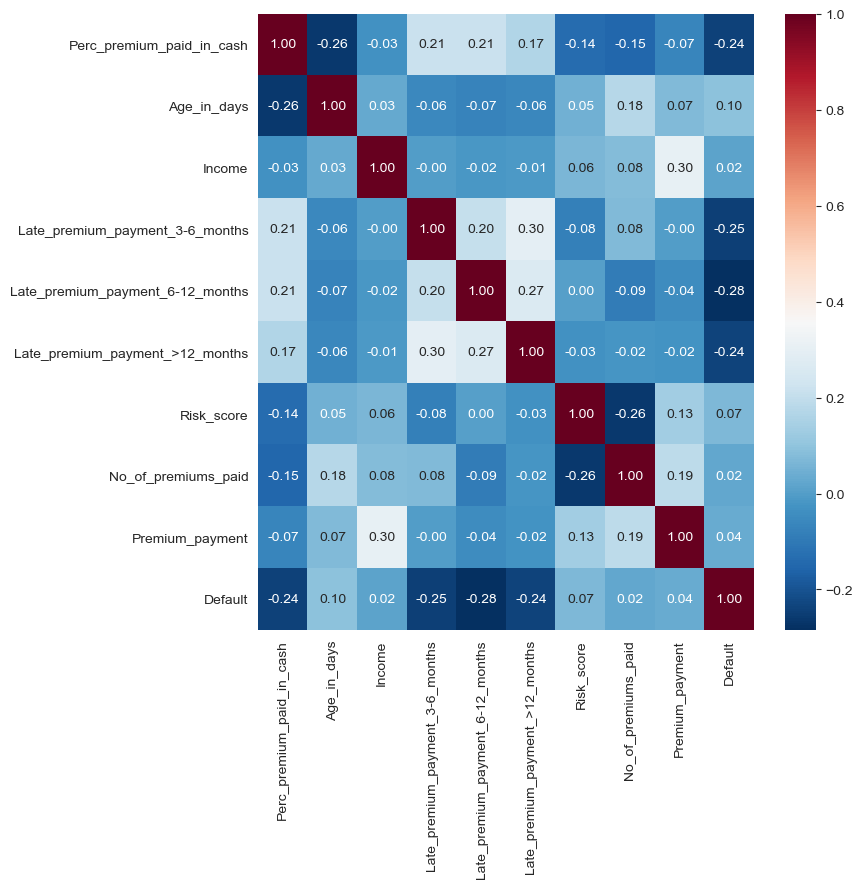

In [37]:
plt.figure(figsize=(8, 8))
sns.heatmap(data[num_corr_vars].corr(method='pearson'), annot=True, fmt=".2f", cmap='RdBu_r')
plt.yticks(rotation=0)
plt.show()

**Observation:**
* There no significantly correlated variables according to the Pearson analysis.

*Since there are many outliers in the data, let's run the Spearman correlation analysis which is not sensitive to outliers.*

**Spearman**

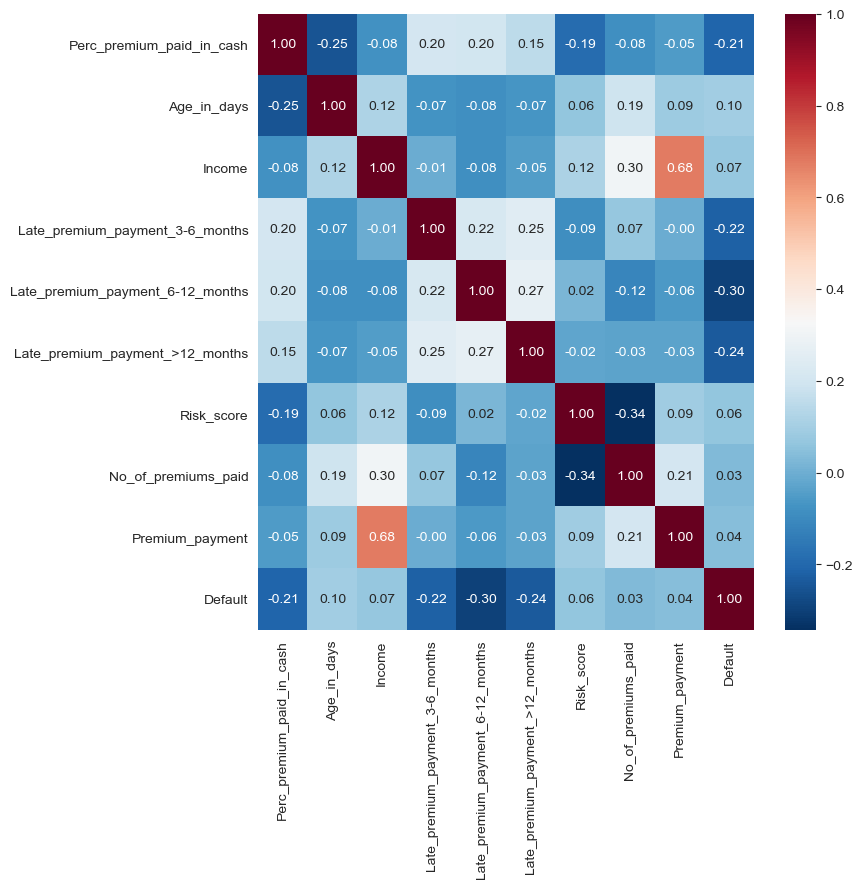

In [38]:
plt.figure(figsize=(8, 8))
sns.heatmap(data[num_corr_vars].corr(method='spearman'), annot=True, fmt=".2f", cmap='RdBu_r')
plt.yticks(rotation=0)
plt.show()

**Observation:**
* There is a highly positive correlation with **Income** and **Premium_payment**

---

In [39]:
def pearson_corr_summary(df, bound):
    """
    This function below generates a list of Pearson correlation
    values bounded by the limit value supplied.
    
    * It requires the dataframe name `df` and `bound`
    * The correlaton values which equal or greater than (+VE) bound
      and less than or equal to the (-VE) bound are displayed
    * The lead diagonal of 1 (correlation with variable and itself) is removed.
    * `df.corr(method = 'pearson')`  - Pearson correlation method.
    """

    # Pearson Correlation function
    corr = df.corr(method='pearson').unstack()
    # Correlation filter value
    corr_filter = corr[((corr >= bound) | (corr <= -bound)) & (corr != 1.0)]
    # Generate a summary while dropping duplicates.
    summary = corr_filter.sort_values(ascending=False).drop_duplicates()
    return summary


def spearman_corr_summary(df, bound):
    """
    This function below generates a list of Spearman correlation
    values bounded by the limit supplied.
    
    * It requires the dataframe name `df` and `bound`
    * The correlaton values which equal or greater than (+VE) bound
      and less than or equal to the (-VE) bound are displayed
    * The lead diagonal of 1 (correlation with variable and itself) is removed.
    * `df.corr(method = 'spearman')`  - Spearman correlation method.
    """

    # Spearman Correlation function
    corr = df.corr(method='spearman').unstack()
    # Correlation filter value
    corr_filter = corr[((corr >= bound) | (corr <= -bound)) & (corr != 1.0)]
    # Generate a summary while dropping duplicates.
    summary = corr_filter.sort_values(ascending=False).drop_duplicates()
    return summary

Let's use a limit of 0.5

In [40]:
pearson_corr_summary(data[num_corr_vars], .5)

Series([], dtype: float64)

In [41]:
spearman_corr_summary(data[num_corr_vars], .5)

Income  Premium_payment    0.678621
dtype: float64

**Observations:**  

The Spearman correlation resulted in only one pair of correlated variables as the data has many outliers.


| Variable1| Variable2 | Correlation | 
| :-: | :-: | :-: |
| **Premium_payment** | **Income** | highly correlated |

---

# Bivariate Analysis

## Bivariate Scatter Plots

Let's generate a pairplot of the numerical variables before we dive into the Numerical Variable Bivariate Analysis

In [42]:
# sns.pairplot(data,corner=True, hue="Default", markers="o");

There are no clear linear relationships among all the variables.

Let's use the variables from the numerical correlation analysis

In [43]:
# sns.pairplot(data[num_corr_vars],corner=True, hue="Default", markers="o");

---

`Income` and `Premium_payment` was observed to be highly correlated.  
Let's visualize using a scatterplot  

**Income** vs **Premium_payment**

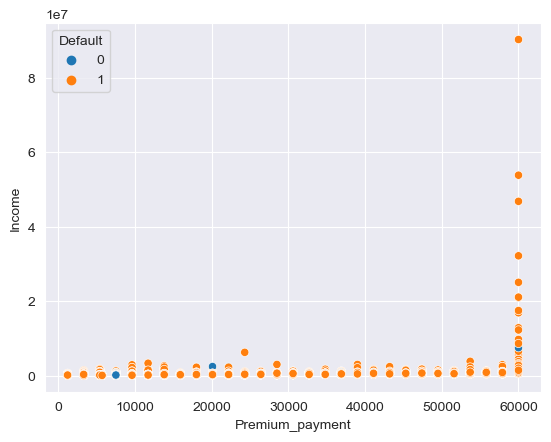

In [44]:
sns.scatterplot(data=data, y='Income', x='Premium_payment',hue='Default');

**Observation:**
* There appears to be a linear relationship which is being masked by the presence of outliers.  
In Part 2 of the Capstone, the outliers will be removed and further analysis will be conducted.

---

## Continuous Variable Exploration

### Numerical - Categorical

Let's define a function to generate numerical and categorical plots

In [45]:
def num_cat_plots(numerical_variable):
    """
    This function creates a list of the 
    categorical variables without the target varible.
    It then generates boxplots for the input
    numerical variable with each categorical variable
    to display the distribution.
    
    """
    cat_vars = data[categorical_vars].columns.to_list()
    cat_vars.remove('Default')
    for cat_var in cat_vars:
        sns.catplot(y=numerical_variable.name,
                    x=cat_var,
                    hue="Default",
                    kind="box",
                    data=data,
                    showmeans=True,
                    height=2,
                    aspect=3)
        plt.show()
        # Line separator
        print('--' * 55)

#### Perc_premium_paid_in_cash

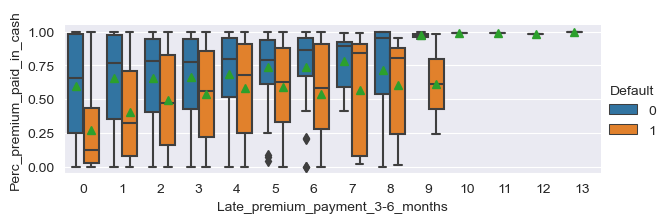

--------------------------------------------------------------------------------------------------------------


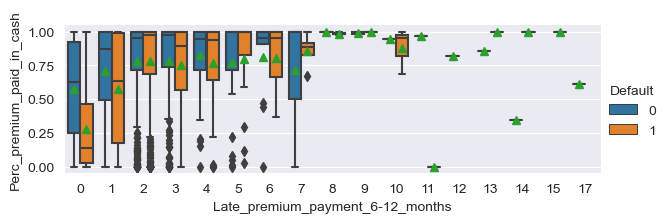

--------------------------------------------------------------------------------------------------------------


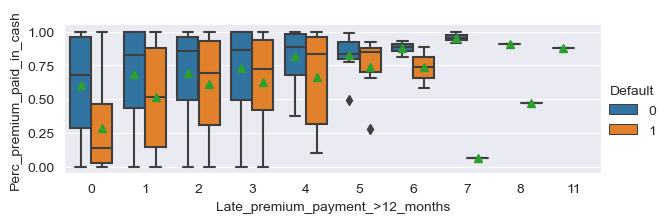

--------------------------------------------------------------------------------------------------------------


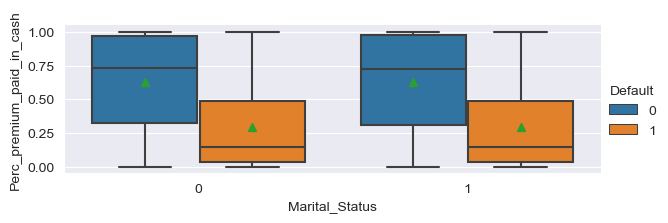

--------------------------------------------------------------------------------------------------------------


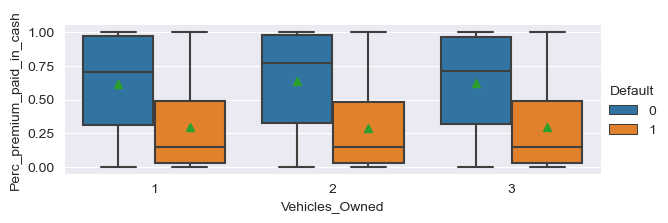

--------------------------------------------------------------------------------------------------------------


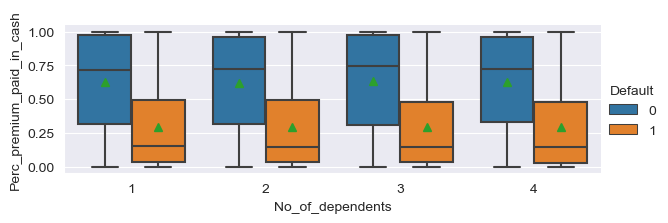

--------------------------------------------------------------------------------------------------------------


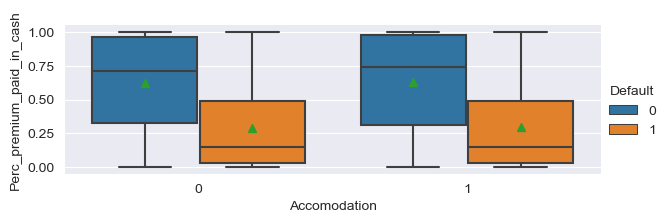

--------------------------------------------------------------------------------------------------------------


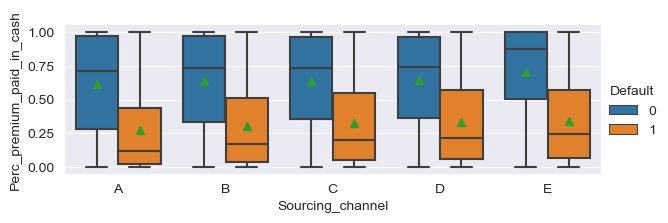

--------------------------------------------------------------------------------------------------------------


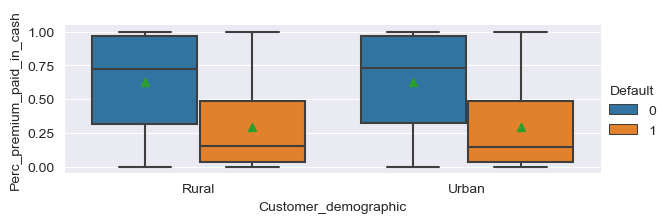

--------------------------------------------------------------------------------------------------------------


In [46]:
num_cat_plots(data.Perc_premium_paid_in_cash)

* **Perc_premium_paid_in_cash**
    * Policy holders who default on their insurance premiums tend to pay the bulk of their premium with cash.   
    More data is need to confirm but a reasonable assumption is the policy holders who default, work at jobs which pays their income in cash.

#### Age_in_days

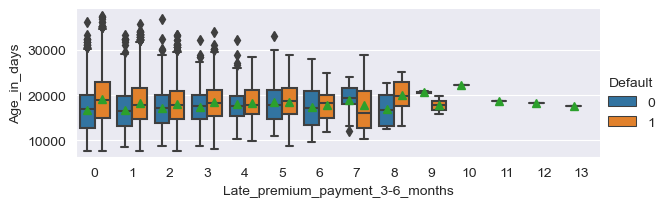

--------------------------------------------------------------------------------------------------------------


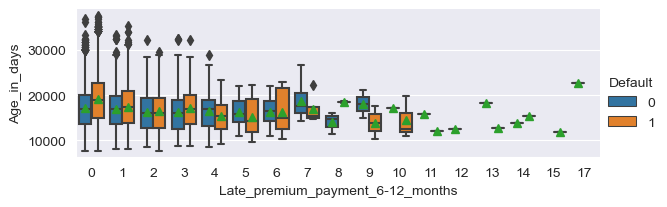

--------------------------------------------------------------------------------------------------------------


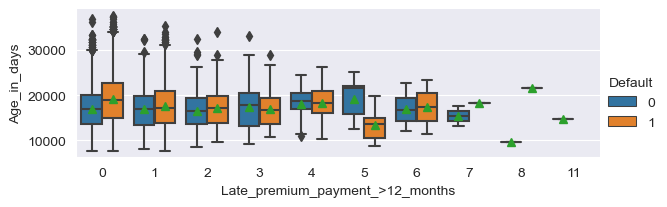

--------------------------------------------------------------------------------------------------------------


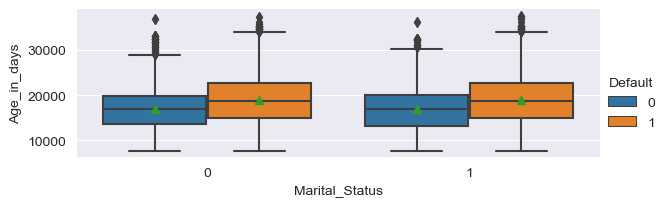

--------------------------------------------------------------------------------------------------------------


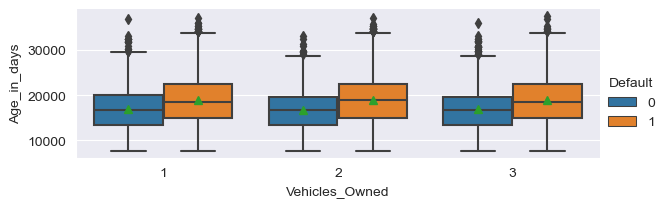

--------------------------------------------------------------------------------------------------------------


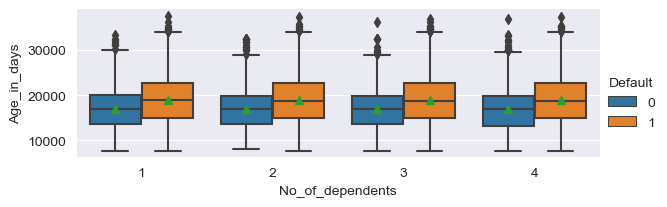

--------------------------------------------------------------------------------------------------------------


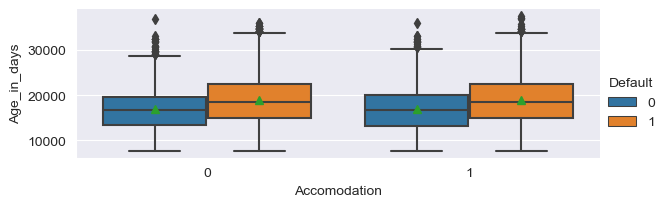

--------------------------------------------------------------------------------------------------------------


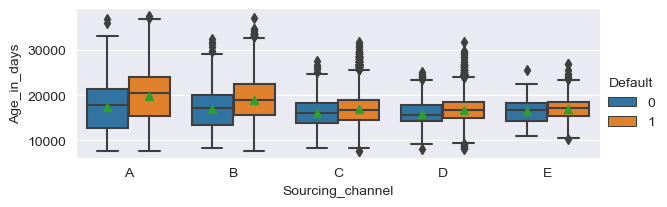

--------------------------------------------------------------------------------------------------------------


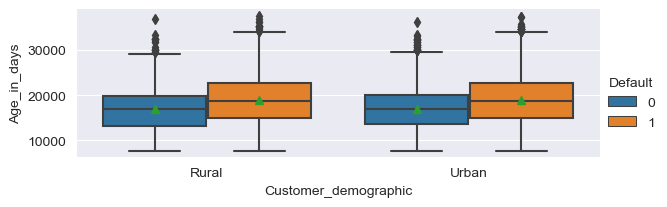

--------------------------------------------------------------------------------------------------------------


In [47]:
num_cat_plots(data.Age_in_days)

* **Age_in_days**
    * The average Age_in_days of policy holders who default on their premium payments is lower than those who dont default.   

#### Income

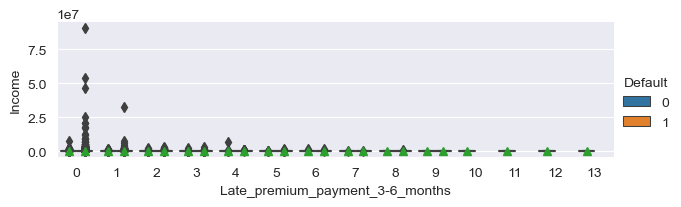

--------------------------------------------------------------------------------------------------------------


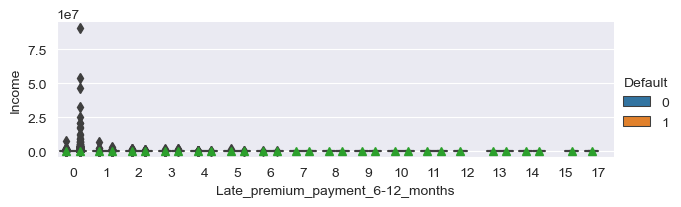

--------------------------------------------------------------------------------------------------------------


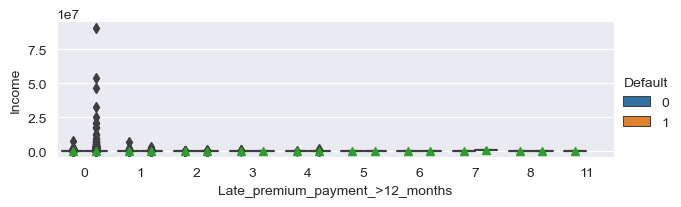

--------------------------------------------------------------------------------------------------------------


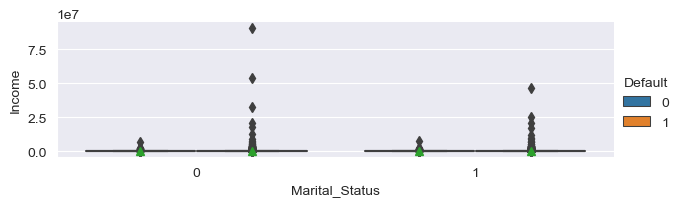

--------------------------------------------------------------------------------------------------------------


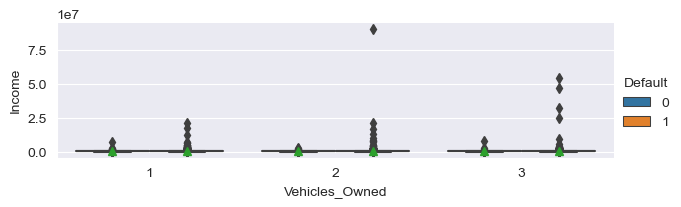

--------------------------------------------------------------------------------------------------------------


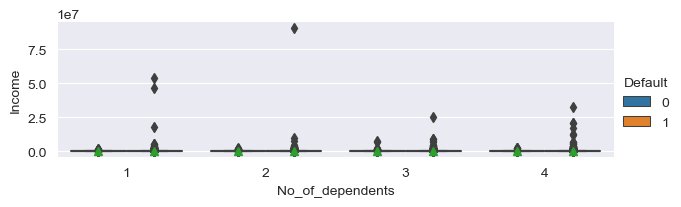

--------------------------------------------------------------------------------------------------------------


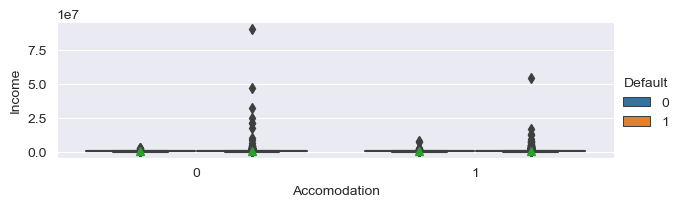

--------------------------------------------------------------------------------------------------------------


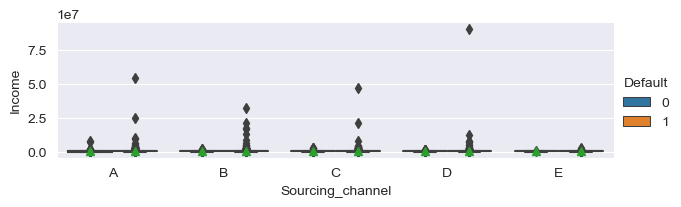

--------------------------------------------------------------------------------------------------------------


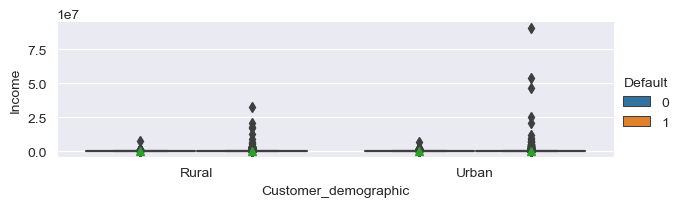

--------------------------------------------------------------------------------------------------------------


In [48]:
num_cat_plots(data.Income)

* **Income**
    * The presence of many outliers make it visually dificult to discern any differnce across defaulters and non-defaulters across income.  
    In the Capstone Part 2, Outlier treatment will be conducted to rectify and allow the any trends to be visually observed.

#### Risk_score

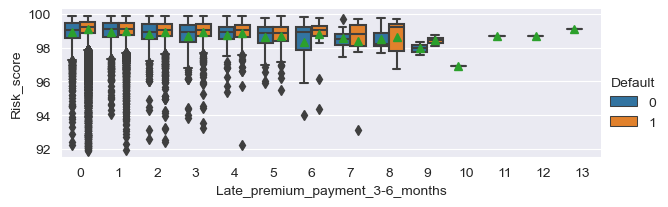

--------------------------------------------------------------------------------------------------------------


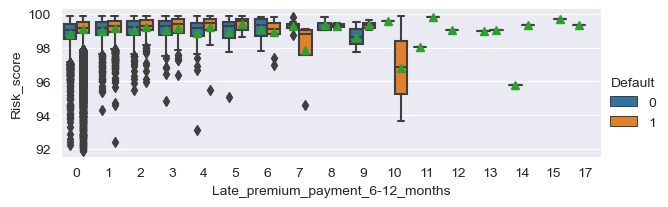

--------------------------------------------------------------------------------------------------------------


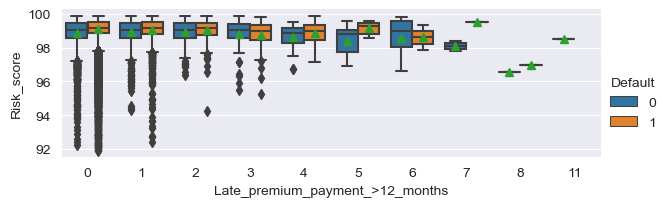

--------------------------------------------------------------------------------------------------------------


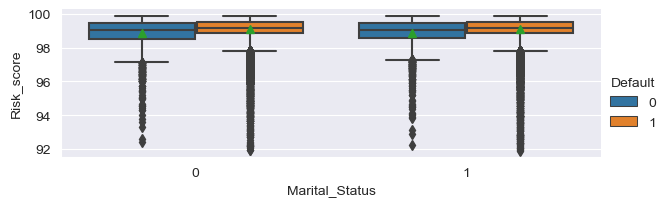

--------------------------------------------------------------------------------------------------------------


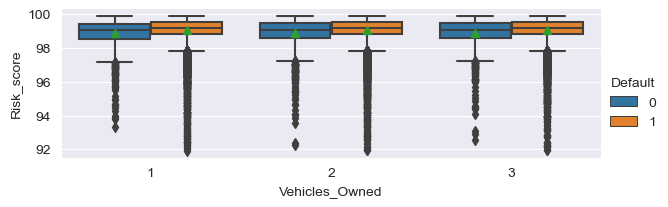

--------------------------------------------------------------------------------------------------------------


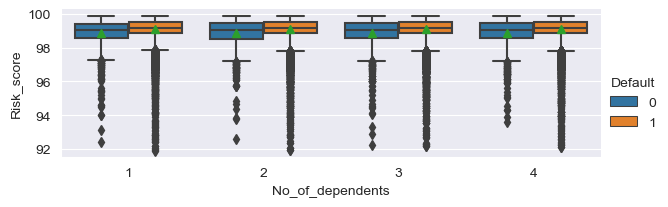

--------------------------------------------------------------------------------------------------------------


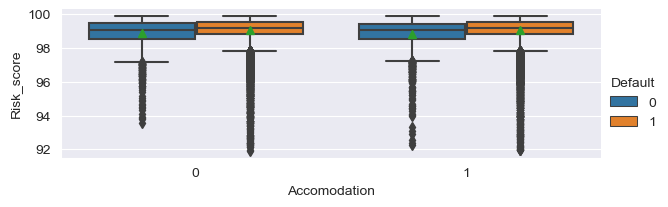

--------------------------------------------------------------------------------------------------------------


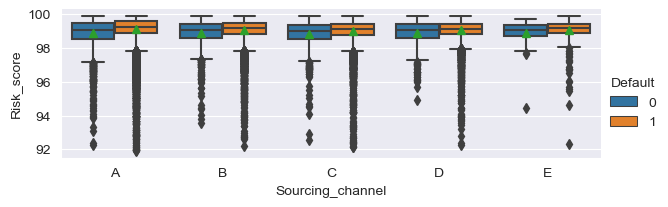

--------------------------------------------------------------------------------------------------------------


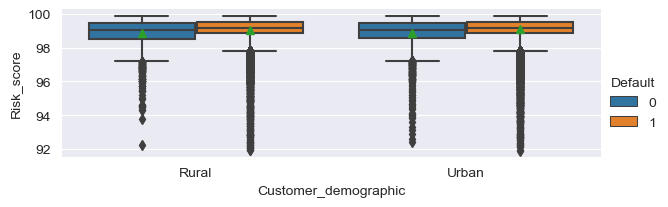

--------------------------------------------------------------------------------------------------------------


In [49]:
num_cat_plots(data.Risk_score)

* **Risk_score**
    * The average Risk_score of policy holders who default on their premium payments is marginally lower than those who don't default.
    * There is a significant quantity of outliers which is prevently clearer distinguishment of any differences between  defaulters and non-defaulters. This will be rectified in Capstone Part 2.

#### No_of_premiums_paid

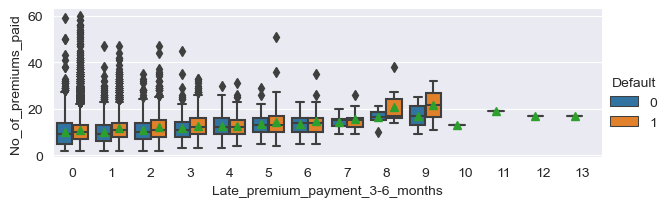

--------------------------------------------------------------------------------------------------------------


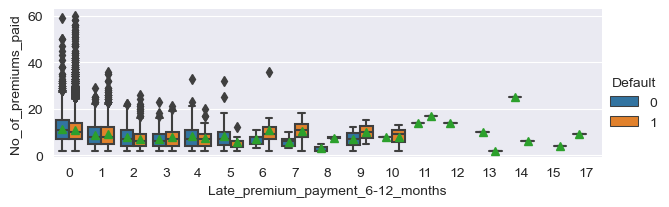

--------------------------------------------------------------------------------------------------------------


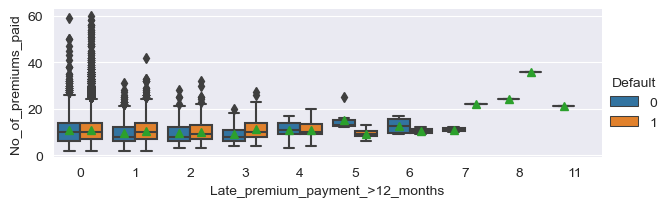

--------------------------------------------------------------------------------------------------------------


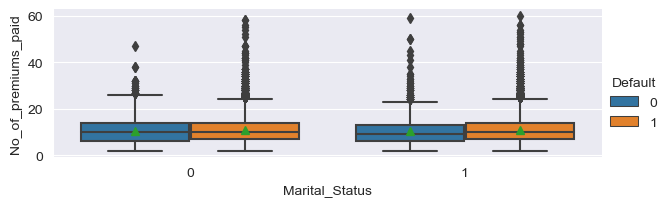

--------------------------------------------------------------------------------------------------------------


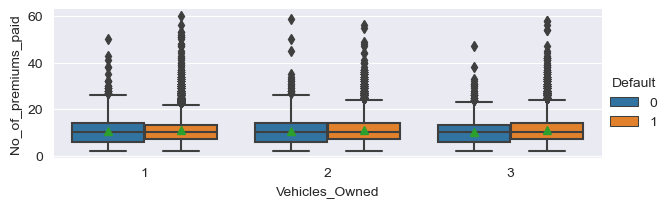

--------------------------------------------------------------------------------------------------------------


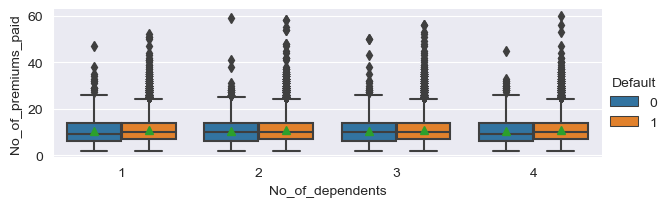

--------------------------------------------------------------------------------------------------------------


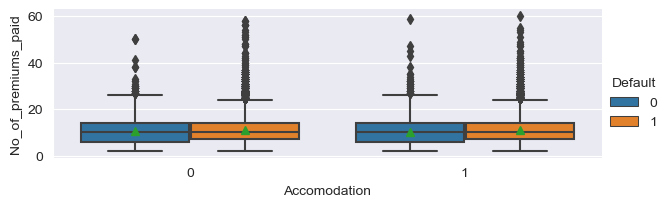

--------------------------------------------------------------------------------------------------------------


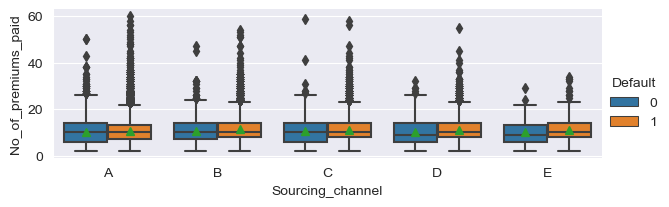

--------------------------------------------------------------------------------------------------------------


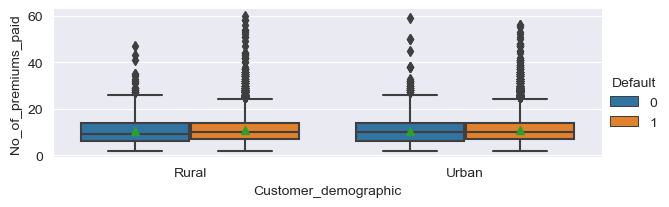

--------------------------------------------------------------------------------------------------------------


In [50]:
num_cat_plots(data.No_of_premiums_paid)

* **No_of_premiums_paid**
    * The average No_of_premiums_paid of policy holders who default on their premium payments is marginally lower than those who don't default.
    There is a significant quantity of outliers which is prevently clearer distinguishment of any differences between defaulters and non-defaulters. This will be rectified in Capstone Part 2.

#### Premium_payment

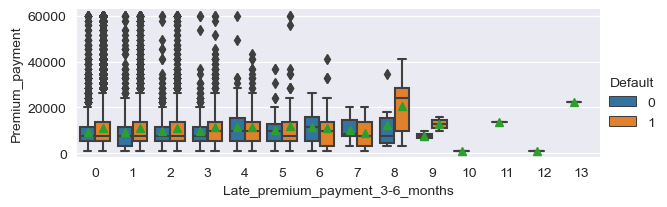

--------------------------------------------------------------------------------------------------------------


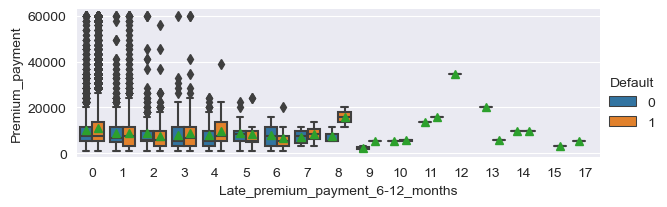

--------------------------------------------------------------------------------------------------------------


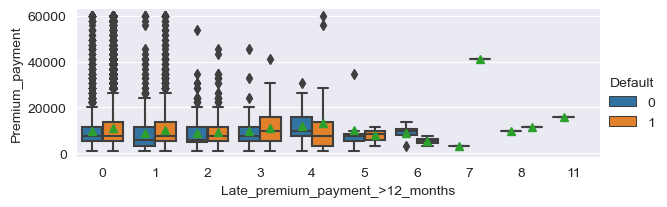

--------------------------------------------------------------------------------------------------------------


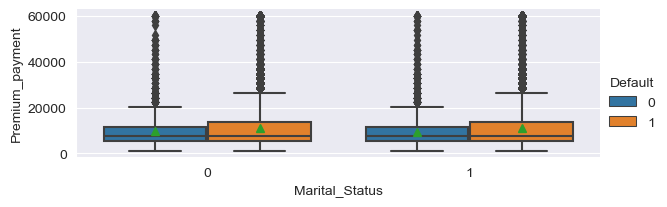

--------------------------------------------------------------------------------------------------------------


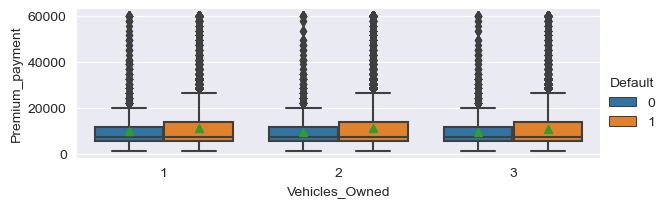

--------------------------------------------------------------------------------------------------------------


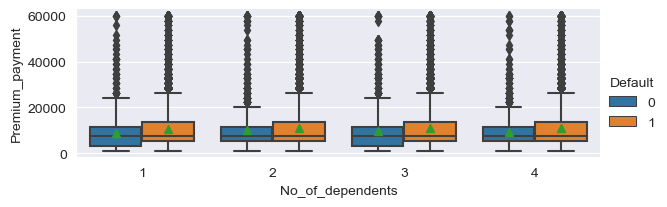

--------------------------------------------------------------------------------------------------------------


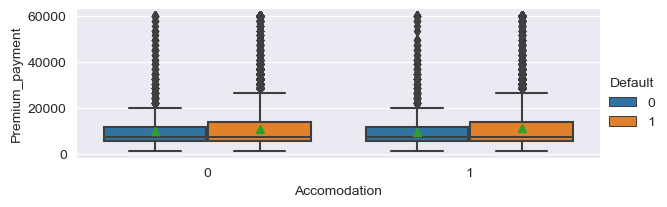

--------------------------------------------------------------------------------------------------------------


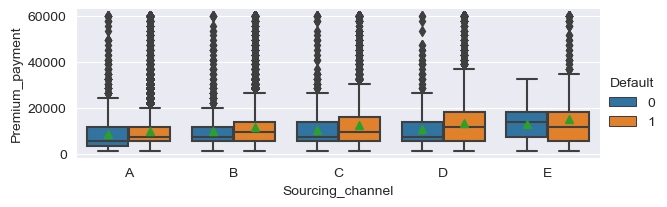

--------------------------------------------------------------------------------------------------------------


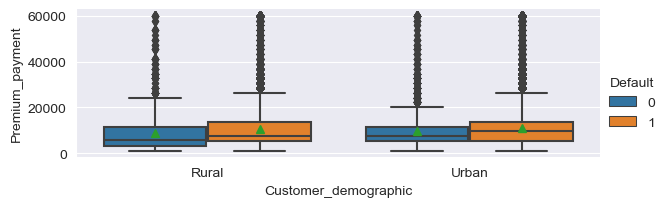

--------------------------------------------------------------------------------------------------------------


In [51]:
num_cat_plots(data.Premium_payment)

* **Premium_payment**
    * The average Premium_payment of policy holders who default on their premium payments is lower than those who don't default.

---

**Default by Age_in_days**

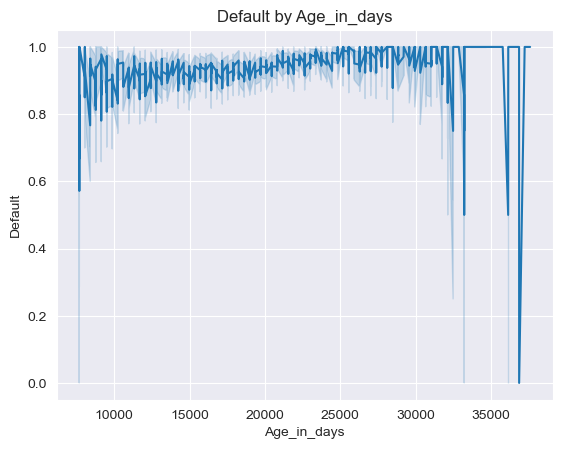

In [52]:
sns.lineplot(x='Age_in_days',y='Default',data=data)
plt.title("Default by Age_in_days");

Observations:
* Senior Adults (80+ years) have a higher probability of defaulting on their insurance premiums.

---

 ## Categorical Variable Exploration

Let's define a function to generate categorical variables vs target variable plots

In [53]:
def categ_target_plots(target_variable):
    """
    This function creates a list of the 
    categorical variables without the target varible.
    It then generates countplots for the input
    target variable with each categorical variable
    to display the distribution.
    
    """
    cat_vars = data[categorical_vars].columns.to_list()
    cat_vars.remove(target_variable.name)

    for cat_var in cat_vars:
        sns.catplot(data=data,
                    y=cat_var,
                    hue=target_variable.name,
                    kind="count")
        plt.title("{} by {}".format(cat_var, target_variable.name),
                  loc="center",
                  fontsize=16)
        plt.show()
        # Line separator
        print('--' * 55)

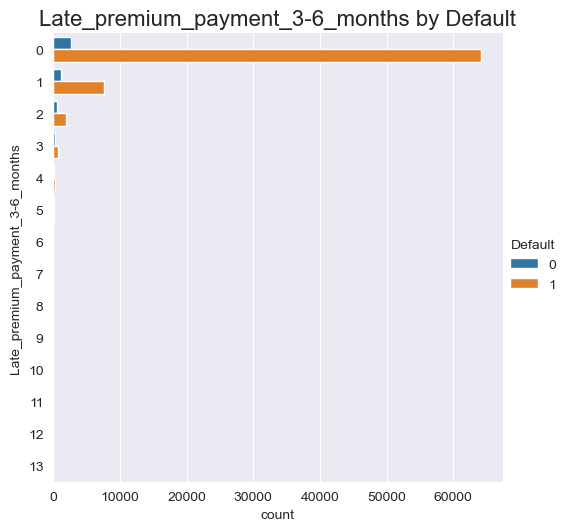

--------------------------------------------------------------------------------------------------------------


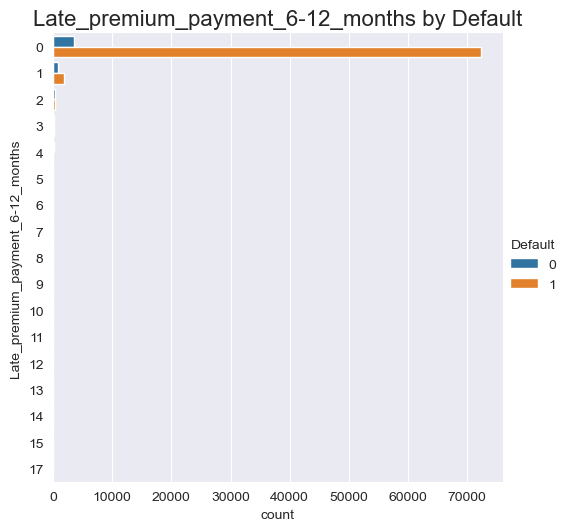

--------------------------------------------------------------------------------------------------------------


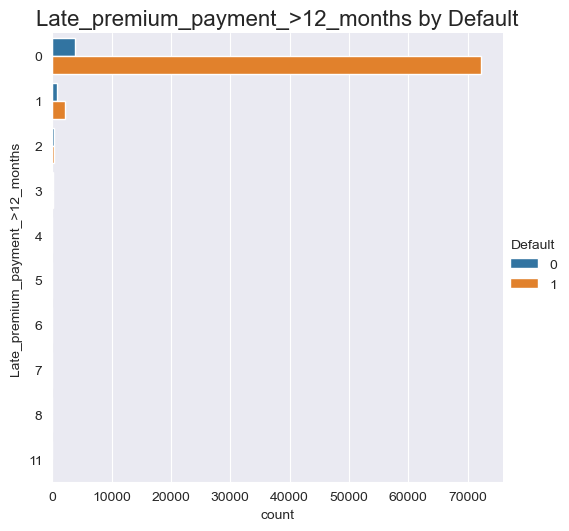

--------------------------------------------------------------------------------------------------------------


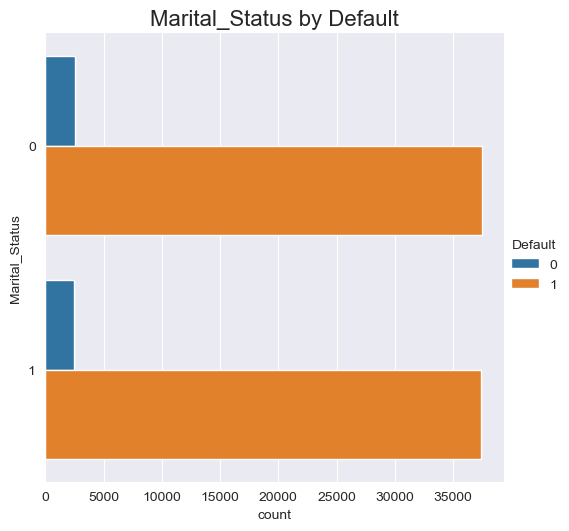

--------------------------------------------------------------------------------------------------------------


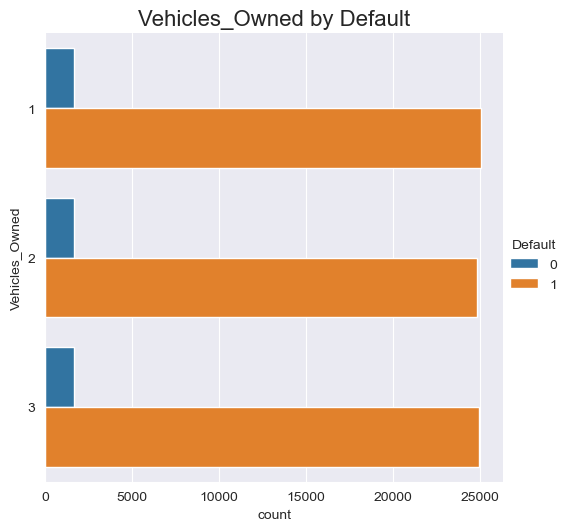

--------------------------------------------------------------------------------------------------------------


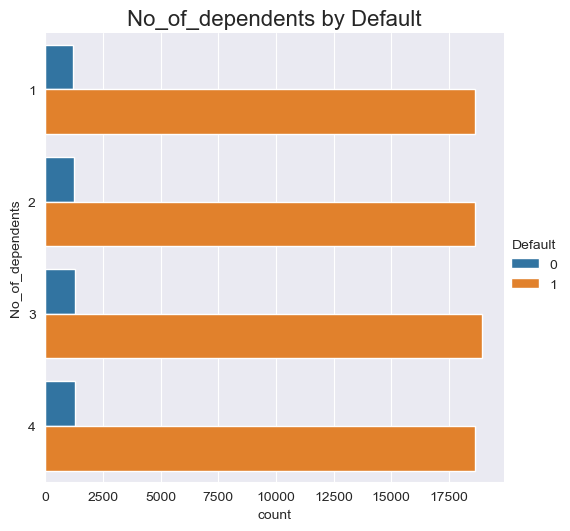

--------------------------------------------------------------------------------------------------------------


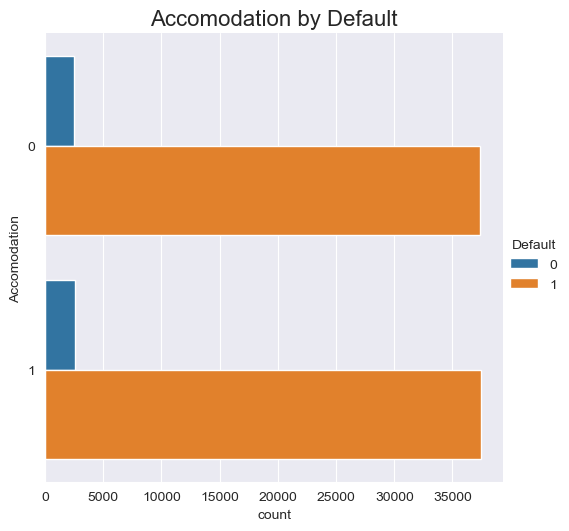

--------------------------------------------------------------------------------------------------------------


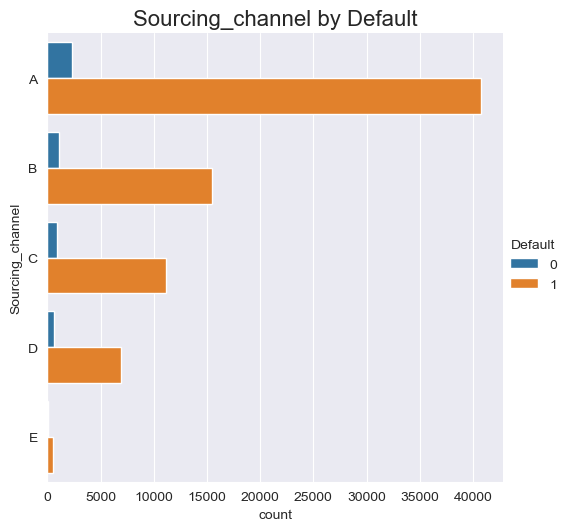

--------------------------------------------------------------------------------------------------------------


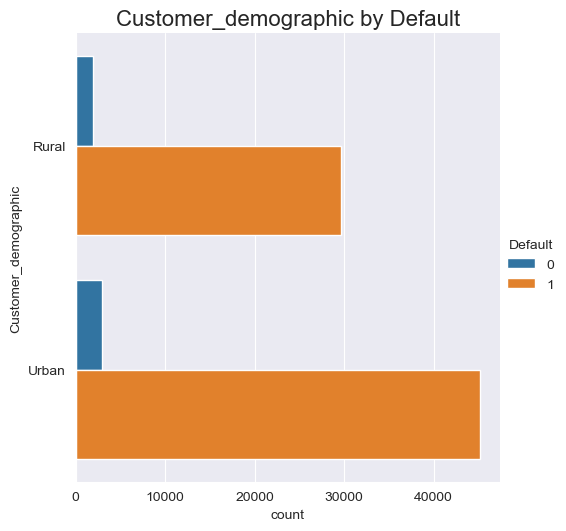

--------------------------------------------------------------------------------------------------------------


In [54]:
categ_target_plots(data.Default)

---

In [55]:
def stacked_plot(x, flag=True):
    sns.set(palette='nipy_spectral')
    table_values = pd.crosstab(x, data['Default'], margins=True)
    if flag == True:
        display(table_values)

    table_norm = pd.crosstab(x, data['Default'], normalize='index')
    table_norm.plot(kind='bar', stacked=True, figsize=(8, 5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.xticks(rotation=45)
    plt.show()
    print('-'*80)  

Default,0,1,All
Late_premium_payment_3-6_months,,,
0,2687,64211,66898
1,1153,7673,8826
2,592,1927,2519
3,288,666,954
4,158,216,374
5,67,101,168
6,31,37,68
7,10,13,23
8,6,9,15


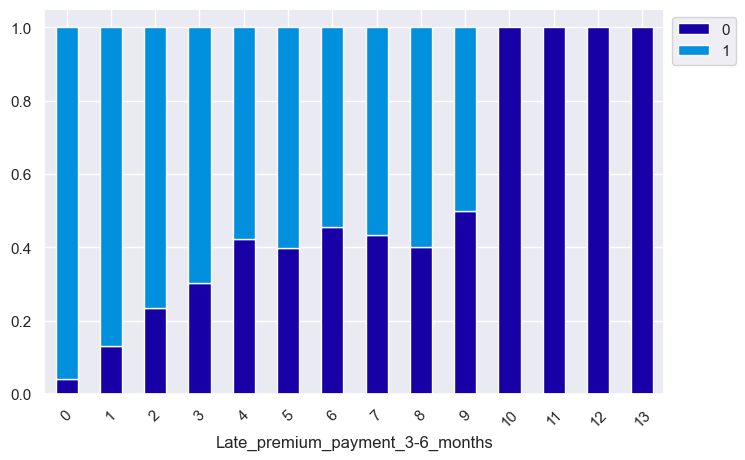

--------------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

Default,0,1,All
Late_premium_payment_6-12_months,,,
0,3505,72423,75928
1,828,1852,2680
2,334,359,693
3,185,132,317
4,85,45,130
5,30,16,46
6,13,13,26
7,7,4,11
8,3,2,5


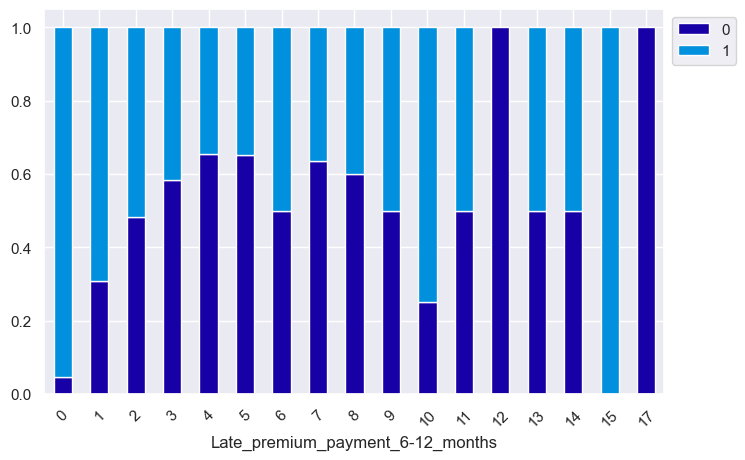

--------------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

Default,0,1,All
Late_premium_payment_>12_months,,,
0,3810,72325,76135
1,835,2161,2996
2,228,270,498
3,85,66,151
4,25,23,48
5,7,6,13
6,4,2,6
7,2,1,3
8,1,1,2


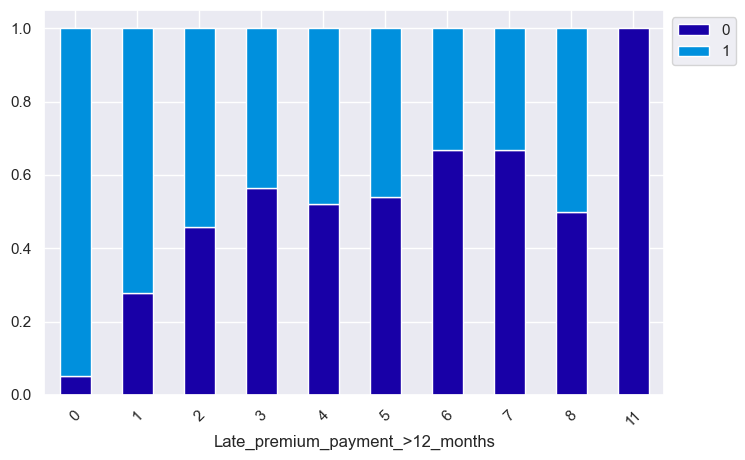

--------------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

Default,0,1,All
Marital_Status,,,
0,2571,37461,40032
1,2427,37394,39821
All,4998,74855,79853


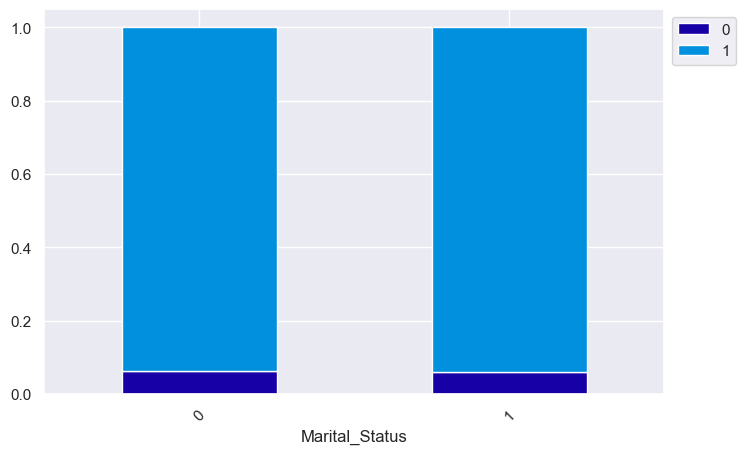

--------------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

Default,0,1,All
Vehicles_Owned,,,
1,1668,25078,26746
2,1678,24842,26520
3,1652,24935,26587
All,4998,74855,79853


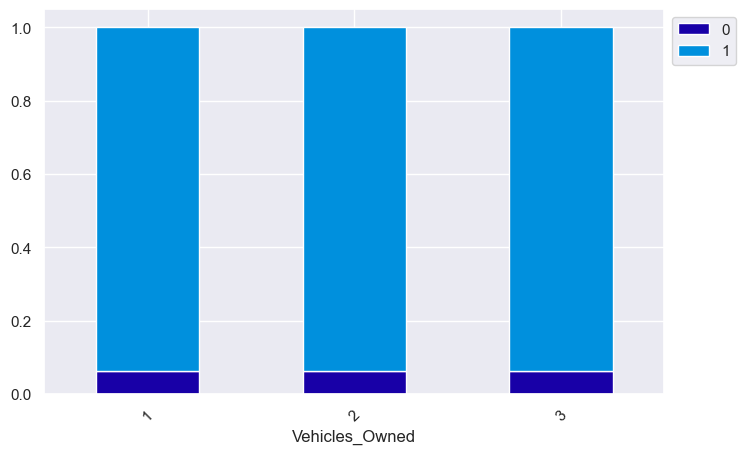

--------------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

Default,0,1,All
No_of_dependents,,,
1,1190,18650,19840
2,1258,18644,19902
3,1283,18932,20215
4,1267,18629,19896
All,4998,74855,79853


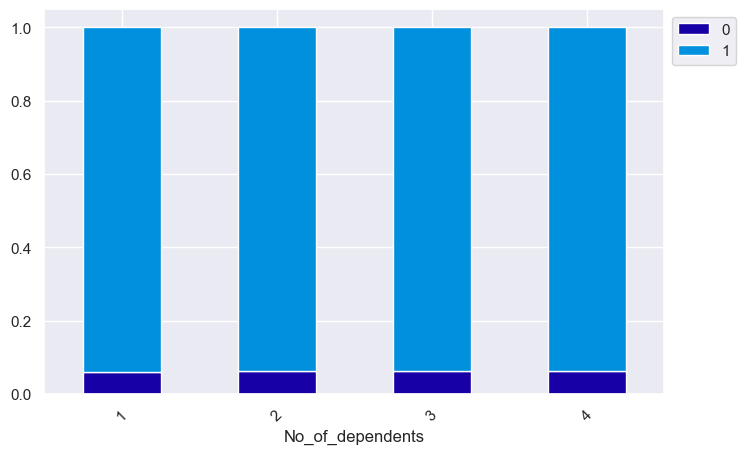

--------------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

Default,0,1,All
Accomodation,,,
0,2453,37370,39823
1,2545,37485,40030
All,4998,74855,79853


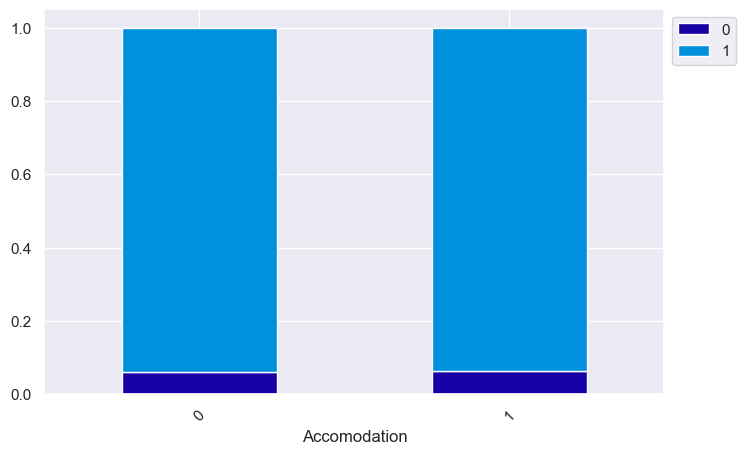

--------------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

Default,0,1,All
Sourcing_channel,,,
A,2349,40785,43134
B,1066,15446,16512
C,903,11136,12039
D,634,6925,7559
E,46,563,609
All,4998,74855,79853


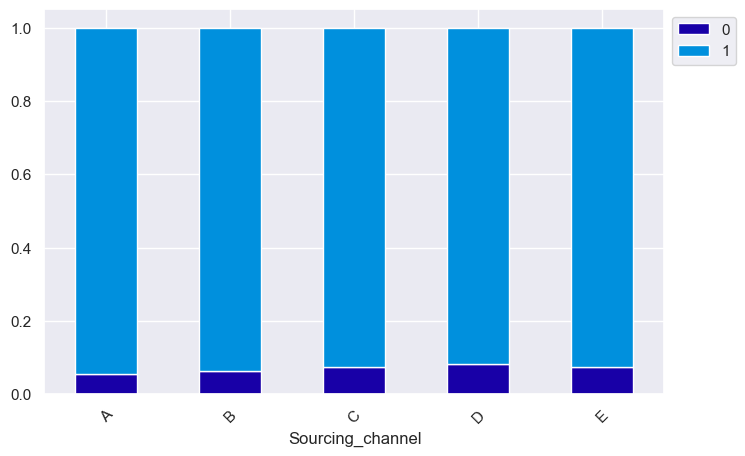

--------------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

Default,0,1,All
Customer_demographic,,,
Rural,1998,29672,31670
Urban,3000,45183,48183
All,4998,74855,79853


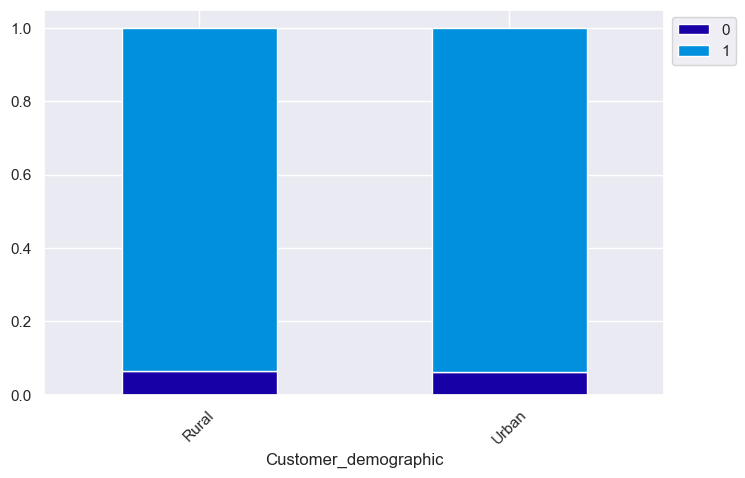

--------------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

In [56]:
# Categorical variables
categ_list = data[categorical_vars].columns.to_list()
categ_list.remove('Default')

for each_var in categ_list:
    stacked_plot(data[each_var])
    plt.figure()
    plt.show();

<font color='red'>**The later the insurance premium payment, the higher probability of the policy holder being a defaulter.**

---